In [2]:
import pandas as pd 

data = pd.read_csv('Prizes - Main Sheet.csv')

data.head()

,Full name (First and Last name),Mobile number,Pincode,"Flat, House no., Building, Company, Apartment","Area, Street, Sector, Village",Landmark,Town/City,State,Country/Region,Aadhar Card,Competition Won (Incase you got top ranks in multiple events select the one in which you got the highest rank),Comments/feedback,Age Category,Highest Rank ( rank got In the above selected competition)
0,A. Sai Yeshin Reddy,9703631217,500011,"7-4-232, Vamshee Industries","Geeta Nagar, Ferozguda, Balanagar",St.Martin's High school,Secunderabad,Telangana,India,https://drive.google.com/open?id=1rkpquwGIDpxi...,Extempore,Yeshin got first prize in Extempore and second...,7-10,1.0
1,Advaitha S Adiga,9535156738,560064,"No 6/2/2, Hrudhyam,6 th cross, Chitra layout, ...",Chitra layout,Clarion hotel,Yelahanka New Town,Karnataka,India,https://drive.google.com/open?id=1E7sgwArbljWD...,Shloka Recitation Competition,Motivational opportunity🙏,11-14,1.0
2,Ambala Vandita,9908574755,500088,"12-54/12, Venkatadri Township, Phase-3","Chowdariguda, Pocharam, Ghatkesar Mandal","Post office lane, behind Sai baba temple",Medchal Malkajgiri District,Telangana,India,https://drive.google.com/open?id=1l3rAWh_DTzU9...,Shloka Recitation Competition,NaN,3-6,1.0
3,Amit Kumar,6207717951,844111,"Chaudhary tola belwar, bahilwara bhual, muzaff...","Chaudhary tola belwar, bahilwara bhual, muzaff...",Near Shiv mandir,Muza,Bihar,India,https://drive.google.com/open?id=1pkCDrRbFV7p5...,Gita Quiz,NaN,18+,1.0
4,Aradhana Singh,92637 93682,741313,"sachi garden, D7","Abhay Nagar, Nadia",NaN,Sridham Mayapur,West bengal,India,https://drive.google.com/open?id=12h5QpPP2c0ik...,Shloka Recitation Competition,i was not informed that i was one of the winne...,15-18,1.0


In [1]:
# rename the column

import pyomo.environ as pyo
from pyomo.environ import ConcreteModel, Var, NonNegativeReals, Objective, minimize, Constraint, SolverFactory

# ---------------------
# 1) Define the model
# ---------------------
model = ConcreteModel()

# List of generators
generators = ['DG1', 'DG2', 'DG3', 'DG4']
model.G = pyo.Set(initialize=generators)

# ---------------------
# 2) Generator data
# ---------------------
# Quadratic cost coefficients: C_i(P) = alpha + beta*P + gamma*P^2
alpha = {
    'DG1': 310.0,
    'DG2': 283.0,
    'DG3': 458.0,
    'DG4': 273.0
}

beta = {
    'DG1': 7.8,
    'DG2': 7.5,
    'DG3': 7.8,
    'DG4': 7.8
}

gamma = {
    'DG1': 0.036,
    'DG2': 0.00342,
    'DG3': 0.00182,
    'DG4': 0.00180
}

# Power generation limits (MW)
P_min = {
    'DG1': 0.0,
    'DG2': 0.0,
    'DG3': 0.0,
    'DG4': 0.0
}
P_max = {
    'DG1': 120.0,
    'DG2': 80.0,
    'DG3': 120.0,
    'DG4': 110.0
}

# Total demand to be met (MW)
demand = 200.0

# --------------------------------
# 3) Decision variables: P[i]
# --------------------------------
# Each generator's power output
def power_bounds(model, g):
    return (P_min[g], P_max[g])

model.P = Var(model.G, domain=NonNegativeReals, bounds=power_bounds)

# --------------------------------
# 4) Objective: Minimize total cost
# --------------------------------
def total_cost_rule(model):
    return sum(alpha[g] + beta[g]*model.P[g] + gamma[g]*(model.P[g]**2) for g in model.G)

model.TotalCost = Objective(rule=total_cost_rule, sense=minimize)

# ------------------------------------------------
# 5) Constraint: Sum of generation = demand
# ------------------------------------------------
def demand_constraint_rule(model):
    return sum(model.P[g] for g in model.G) == demand

model.DemandConstraint = Constraint(rule=demand_constraint_rule)

# ---------------------
# 6) Solve the problem
# ---------------------
solver = SolverFactory('glpk')  # or any other MILP/QP solver
solution = solver.solve(model, tee=False)

# ---------------------
# 7) Print results
# ---------------------
print("Solver Status:", solution.solver.status)
print("Solver Termination Condition:", solution.solver.termination_condition)
print("")

print("Optimal Dispatch (MW) per Generator:")
for g in model.G:
    print(f"  {g}: {model.P[g].value:.4f} MW")

print(f"\nTotal Generation = {sum(model.P[g].value for g in model.G):.4f} MW")
print(f"Total Cost = {pyo.value(model.TotalCost):.4f} $ (arbitrary cost units)")


ValueError: Model objective (TotalCost) contains nonlinear terms that cannot be written to LP format

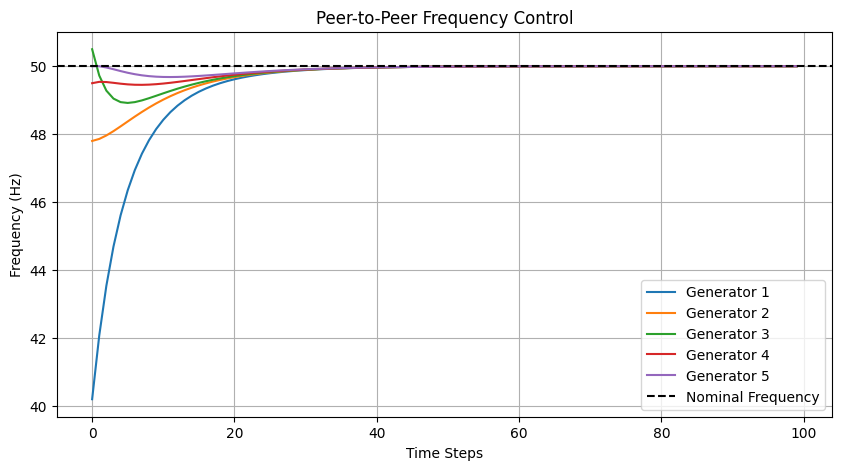

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Number of generators (nodes)
N = 5  

# Adjacency matrix (defines connections between generators)
# 1 means connected, 0 means no connection
adj_matrix = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 1, 1, 0]
])

# Initial frequencies (Hz)
f_initial = np.array([40.2, 47.8, 50.5, 49.5, 50.0])  # Each generator has a different initial frequency

# Nominal frequency (Hz)
f_nominal = 50.0  

# Control gains
K = 0.1  # Self-correction gain
K_ij = 0.05  # Coupling gain between neighbors

# Time simulation
T = 100  # Total time steps
frequencies = np.zeros((N, T))  # Store frequencies over time
frequencies[:, 0] = f_initial  # Set initial conditions

# Peer-to-peer frequency control using consensus
for t in range(1, T):
    f_next = np.copy(frequencies[:, t-1])
    
    for i in range(N):
        delta_f = -K * (frequencies[i, t-1] - f_nominal)  # Self-regulation
        for j in range(N):
            if adj_matrix[i, j] == 1:  # If connected
                delta_f += -K_ij * (frequencies[i, t-1] - frequencies[j, t-1])  # Neighbor influence
        
        f_next[i] += delta_f  # Update frequency
        
    frequencies[:, t] = f_next  # Store updated values

# Plot the frequency convergence
plt.figure(figsize=(10, 5))
for i in range(N):
    plt.plot(frequencies[i, :], label=f'Generator {i+1}')
    
plt.axhline(y=f_nominal, color='black', linestyle='--', label='Nominal Frequency')
plt.xlabel('Time Steps')
plt.ylabel('Frequency (Hz)')
plt.title('Peer-to-Peer Frequency Control')
plt.legend()
plt.grid()
plt.show()


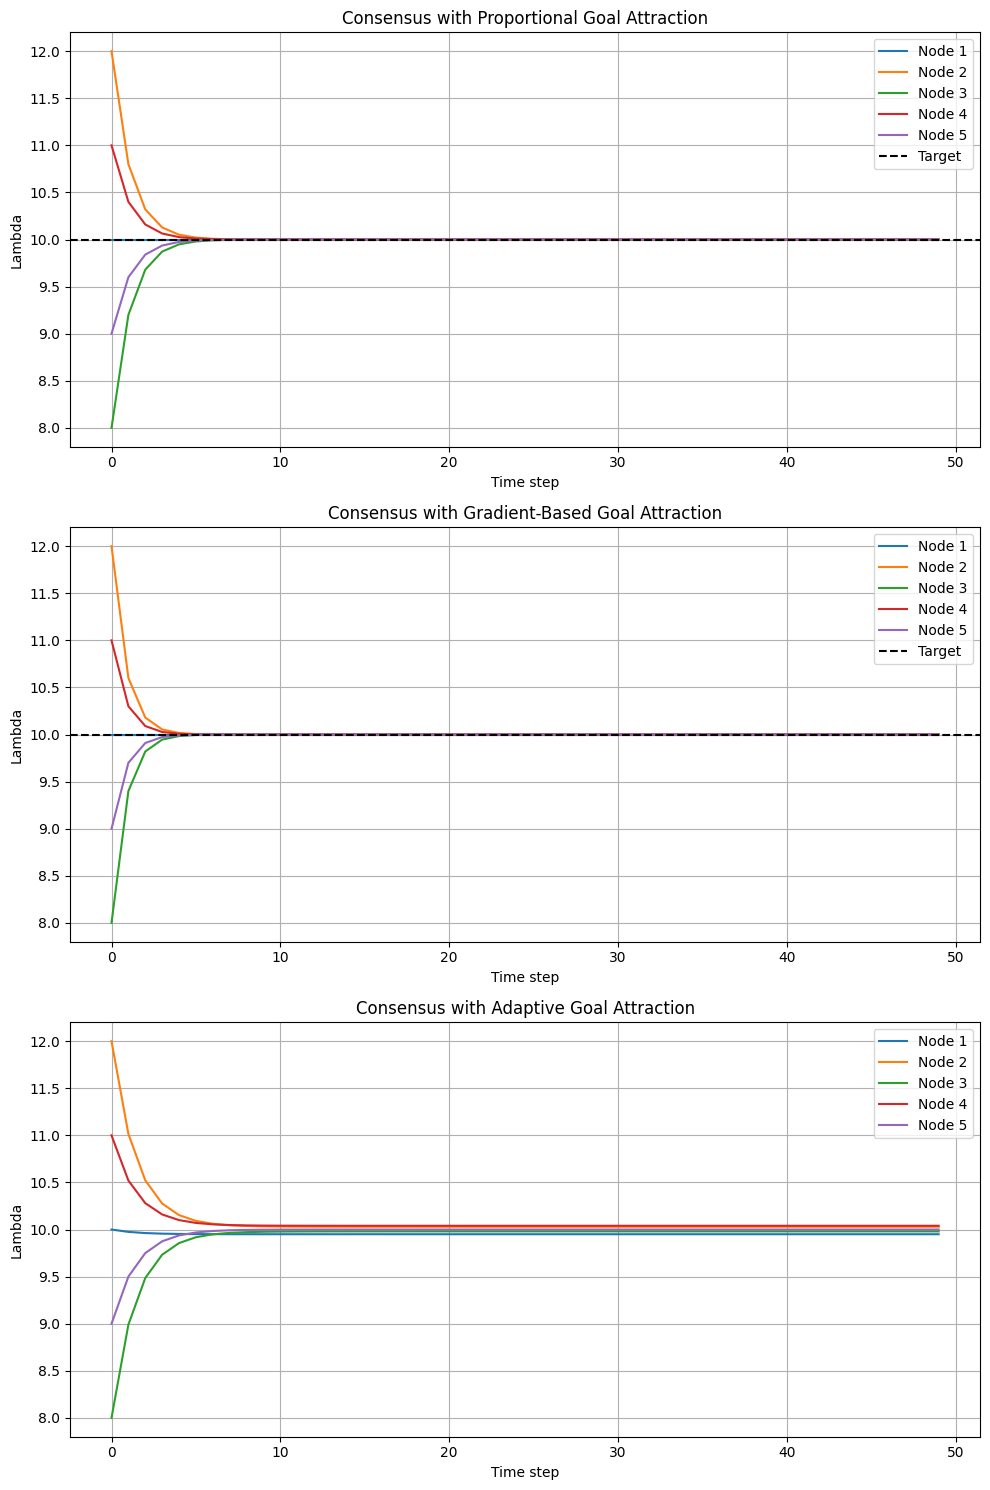

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
N = 5             # Number of nodes
T = 50           # Total simulation time steps
tau = 0.1         # Consensus (interaction) gain

# Fully connected network: each node is connected to every other node (except itself)
adj = np.ones((N, N)) - np.eye(N)

# Initial values for lambda (could represent Lagrange multipliers, marginal costs, etc.)
lambda_init = np.array([10, 12, 8, 11, 9])
lambda_target = 10  # Desired consensus value for proportional & gradient methods

# Mismatch values for adaptive control (simulated differences between generation and demand)
d = np.array([0.5, -0.3, 0.2, -0.4, 0.0])

# Gains for different methods
alpha = 0.1  # Proportional control gain
beta = 0.2   # Gradient-based control gain
mu = 0.05    # Adaptive control gain

# Simulation function: applies a consensus update with a given goal attraction function
def simulate_consensus(goal_func, param, lambda_init, T, tau, adj):
    N = len(lambda_init)
    lambdas = np.zeros((N, T))
    lambdas[:, 0] = lambda_init
    for k in range(1, T):
        lambdas[:, k] = lambdas[:, k-1].copy()
        for i in range(N):
            # Standard consensus term: average the differences with neighbors
            consensus_term = np.sum(adj[i, :] * (lambdas[:, k-1] - lambdas[i, k-1]))
            # Goal attraction term: computed using the passed function (could be proportional, gradient-based, or adaptive)
            goal_term = goal_func(lambdas[i, k-1], param, i)
            # Update rule: current state plus consensus and goal attraction corrections
            lambdas[i, k] += tau * consensus_term + goal_term
    return lambdas

# Define goal attraction functions
def proportional_goal(lmbd, param, i):
    # param: (lambda_target, alpha)
    lambda_target, alpha = param
    return alpha * (lambda_target - lmbd)

def gradient_goal(lmbd, param, i):
    # For quadratic cost F = 0.5*(lambda - lambda_target)^2, the gradient is (lambda - lambda_target)
    # Using negative gradient direction: G = -beta * (lambda - lambda_target)
    lambda_target, beta = param
    return -beta * (lmbd - lambda_target)

def adaptive_goal(lmbd, param, i):
    # For adaptive control, use mismatch d[i] with gain mu: G = -mu * d[i]
    d, mu = param
    return -mu * d[i]

# Pack parameters for each method
prop_param = (lambda_target, alpha)
grad_param = (lambda_target, beta)
adaptive_param = (d, mu)

# Run simulations for each goal attraction function
lambdas_prop = simulate_consensus(proportional_goal, prop_param, lambda_init, T, tau, adj)
lambdas_grad = simulate_consensus(gradient_goal, grad_param, lambda_init, T, tau, adj)
lambdas_adaptive = simulate_consensus(adaptive_goal, adaptive_param, lambda_init, T, tau, adj)

# Plot results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
time = np.arange(T)

for i in range(N):
    axs[0].plot(time, lambdas_prop[i, :], label=f'Node {i+1}')
    axs[1].plot(time, lambdas_grad[i, :], label=f'Node {i+1}')
    axs[2].plot(time, lambdas_adaptive[i, :], label=f'Node {i+1}')

axs[0].axhline(y=lambda_target, color='black', linestyle='--', label='Target')
axs[0].set_title('Consensus with Proportional Goal Attraction')
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Lambda')

axs[1].axhline(y=lambda_target, color='black', linestyle='--', label='Target')
axs[1].set_title('Consensus with Gradient-Based Goal Attraction')
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Lambda')

axs[2].set_title('Consensus with Adaptive Goal Attraction')
axs[2].set_xlabel('Time step')
axs[2].set_ylabel('Lambda')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


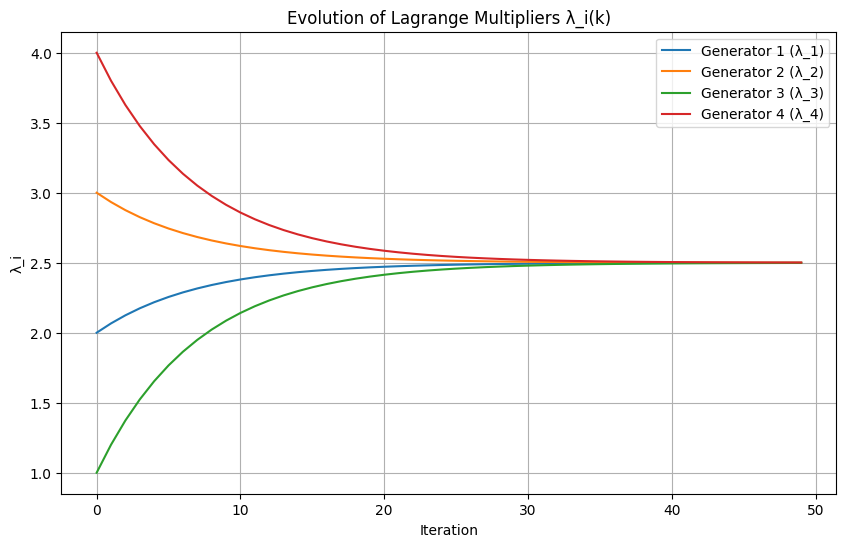

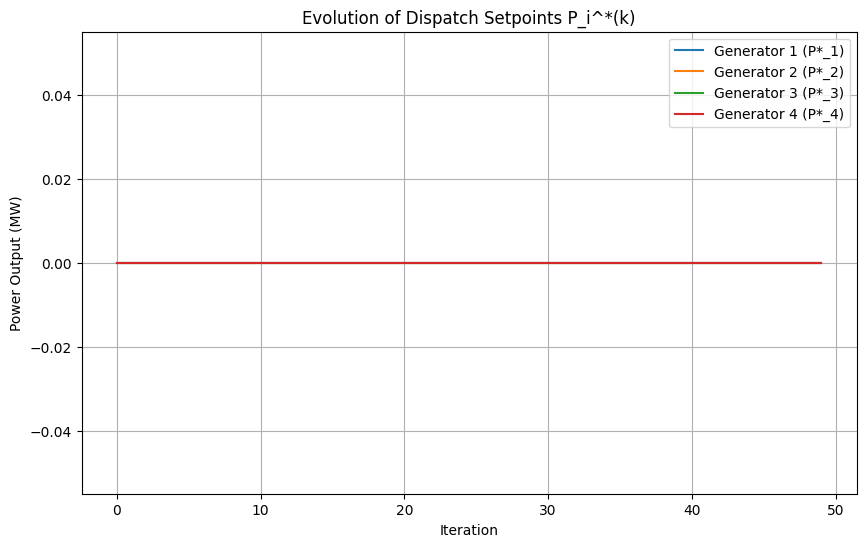

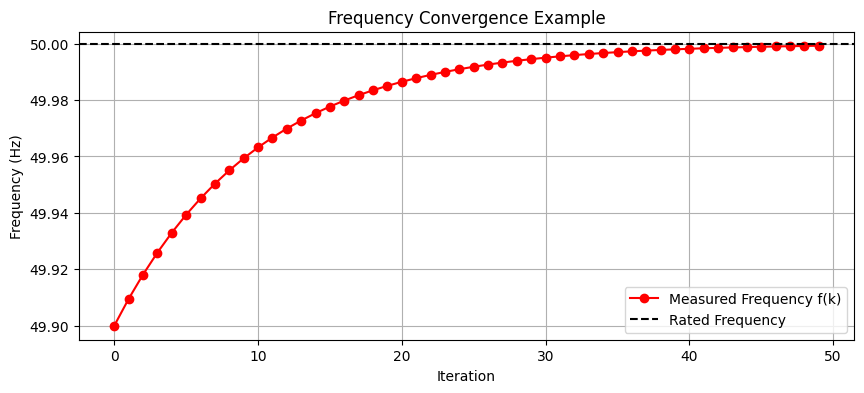

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1) System and Generator Parameters
# ------------------------------------------------
N = 4  # number of distributed generators

# Quadratic cost coefficients: F_i(P_i) = alpha_i * P_i^2 + beta_i * P_i + ...
# (Typical values from your table)
alpha = np.array([561, 310, 278, 453])   # alpha_i
beta  = np.array([8.08, 7.8, 7.85, 8.0]) # beta_i
gamma = np.array([0.00118, 0.00346, 0.00322, 0.00184])  # gamma_i

# Power limits
P_min = np.array([0, 0, 0, 0])           # minimum outputs
P_max = np.array([150, 80, 80, 110])     # maximum outputs

# Rated frequency
f_rated = 50.0

# PI gains for frequency control (Kp_i, Ki_i)
# Here we assume uniform values for simplicity, but can be unique per DG
Kp = np.array([0.5, 0.5, 0.5, 0.5])
Ki = np.array([0.1, 0.1, 0.1, 0.1])

# ------------------------------------------------
# 2) Consensus/Communication Weights
# ------------------------------------------------
# Simple choice: fully-connected graph with equal weights
#   w_ij = 1/(N-1) for j != i, and 0 for j = i
W = (np.ones((N, N)) - np.eye(N)) / (N - 1)

# Consensus step size
tau = 0.1

# ------------------------------------------------
# 3) Simulation Setup
# ------------------------------------------------
T = 50  # total iterations
lambda_vals = np.zeros((N, T))
P_star = np.zeros((N, T))

# Initialize lambdas arbitrarily
lambda_vals[:, 0] = np.array([2.0, 3.0, 1.0, 4.0])  

# Frequency measurement array (f(k))
# For demonstration, let the frequency deviate slightly and approach 50 Hz
f_meas = np.zeros(T)
f_meas[0] = 49.9
for k in range(1, T):
    # Example: an exponential approach to 50 Hz
    f_meas[k] = f_rated - 0.1*np.exp(-0.1*k)

# For convenience, track delta_f(k) = f_rated - f_meas(k)
delta_f = f_rated - f_meas

# ------------------------------------------------
# 4) Main Iteration Loop
# ------------------------------------------------
for k in range(1, T):
    # Retrieve previous iteration's lambdas
    lambda_prev = lambda_vals[:, k-1].copy()
    delta_lambda = np.zeros(N)  # frequency-control term
    
    # Compute the frequency-based adjustment for each generator
    for i in range(N):
        # According to Eq. (18):
        #   Δλ_i(k) = 2 γ_i [Kp_i (Δf(k) - Δf(k-1)) + τ Ki_i Δf(k)]
        df_diff = delta_f[k] - delta_f[k-1] if k > 0 else 0.0
        delta_lambda[i] = 2.0 * gamma[i] * (
            Kp[i] * df_diff + tau * Ki[i] * delta_f[k]
        )
    
    # Compute the consensus term for each generator
    consensus_term = np.zeros(N)
    for i in range(N):
        # sum_{j} w_{ij} [λ_j(k-1) - λ_i(k-1)]
        consensus_term[i] = np.sum(W[i, :] * (lambda_prev - lambda_prev[i]))
    
    # Now update λ_i(k) using Eq. (17):
    # λ_i(k) = λ_i(k-1) + τ * (consensus_term) + Δλ_i(k)
    lambda_vals[:, k] = lambda_prev + tau * consensus_term + delta_lambda
    
    # Compute economic dispatch P_i^*(k) using Eq. (11)
    for i in range(N):
        # Unconstrained solution
        p_unconstrained = (lambda_vals[i, k] - beta[i]) / (2.0 * alpha[i])
        
        # Apply generator limits
        if p_unconstrained < P_min[i]:
            P_star[i, k] = P_min[i]
        elif p_unconstrained > P_max[i]:
            P_star[i, k] = P_max[i]
        else:
            P_star[i, k] = p_unconstrained

# ------------------------------------------------
# 5) Plot Results
# ------------------------------------------------

# Plot λ_i(k) for each generator
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(lambda_vals[i, :], label=f'Generator {i+1} (λ_{i+1})')
plt.title('Evolution of Lagrange Multipliers λ_i(k)')
plt.xlabel('Iteration')
plt.ylabel('λ_i')
plt.grid(True)
plt.legend()
plt.show()

# Plot P_i^*(k) for each generator
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(P_star[i, :], label=f'Generator {i+1} (P*_{i+1})')
plt.title('Evolution of Dispatch Setpoints P_i^*(k)')
plt.xlabel('Iteration')
plt.ylabel('Power Output (MW)')
plt.grid(True)
plt.legend()
plt.show()

# Plot the frequency measurements
plt.figure(figsize=(10, 4))
plt.plot(f_meas, 'r-o', label='Measured Frequency f(k)')
plt.axhline(y=f_rated, color='k', linestyle='--', label='Rated Frequency')
plt.title('Frequency Convergence Example')
plt.xlabel('Iteration')
plt.ylabel('Frequency (Hz)')
plt.grid(True)
plt.legend()
plt.show()


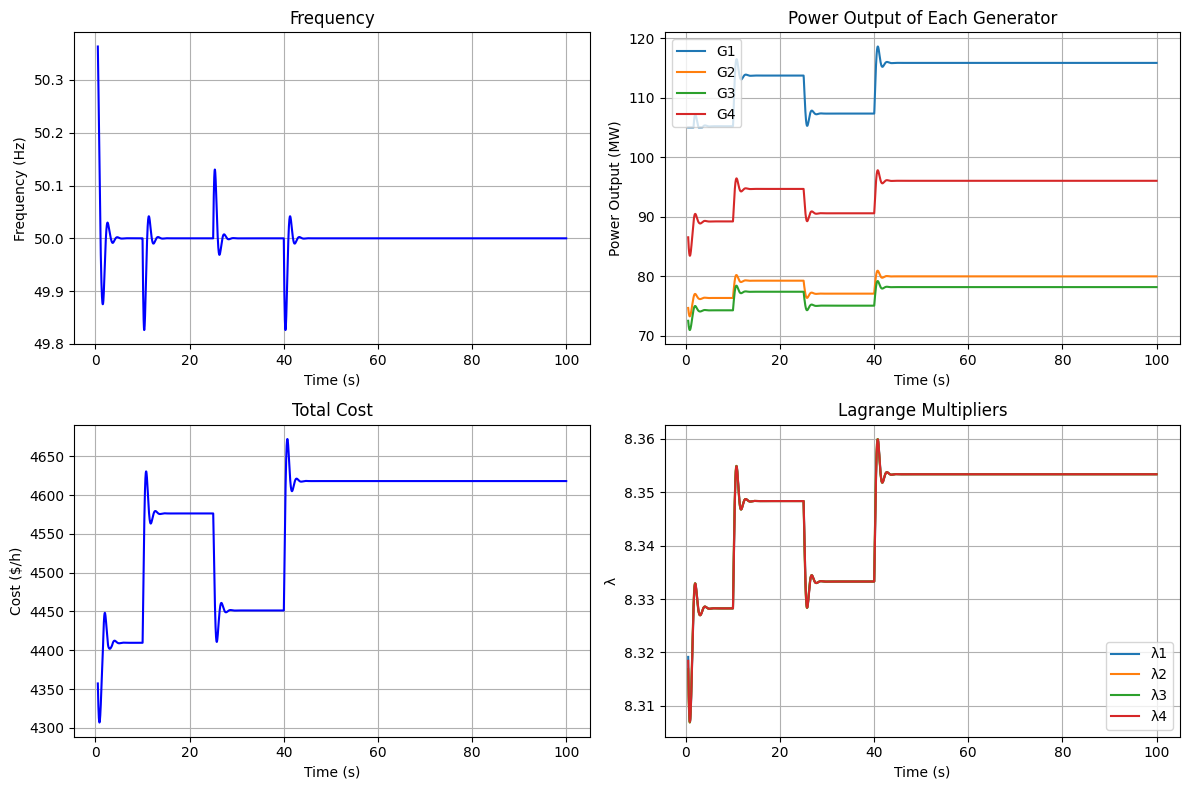

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1) System Parameters
# ------------------------------------------------

N = 4  # Number of generators

# Quadratic cost coefficients for each generator: F_i(P_i) = alpha_i*P_i^2 + beta_i*P_i
alpha = np.array([561, 310, 278, 453])  # alpha_i
beta  = np.array([8.08, 7.80, 7.85, 8.0])  # beta_i
gamma = np.array([0.00118, 0.00346, 0.00322, 0.00184])  # gamma_i (sensitivity factors)

# Rated capacities (MW)
P_rated = np.array([150.0, 80.0, 80.0, 110.0])

# Generator power limits: 70% ~ 105% of rated
P_min = 0.70 * P_rated
P_max = 1.05 * P_rated

# PI controller gains for frequency control
# (You may tune these further for desired performance.)
Kp = 10 * np.ones(N)
Ki = 50 * np.ones(N)

# Rated frequency
f_rated = 50.0

# ------------------------------------------------
# 2) Power System Dynamics Parameters
# ------------------------------------------------
# Simple single-area frequency model: 
#   f_dot = 1/M * ( sum_i(P_i) - P_load - D*(f - f_rated) )
#
# M: aggregate inertia constant (MW·s/Hz), D: damping factor
# These are rough placeholders. Adjust as needed.
M = 20.0  # MW·s/Hz
D = 10.0  # MW/Hz

# ------------------------------------------------
# 3) Communication/Consensus Setup
# ------------------------------------------------
# Assume fully connected graph with uniform weights w_ij = 1/(N-1) for j != i
W = (np.ones((N, N)) - np.eye(N)) / (N - 1)
tau = 0.2  # consensus step size

# ------------------------------------------------
# 4) Time Setup and Load Profile
# ------------------------------------------------
T_end = 100.0     # total simulation time in seconds
dt = 0.01         # time step
steps = int(T_end / dt)

# Define time array
t_array = np.linspace(0, T_end, steps)

# Load demands (MW): L1, L2, L3
# Changes:
#  - at t=10s: L1: 120->140
#  - at t=25s: L2: 75->60
#  - at t=40s: L3: 150->170
#
# We'll store the total load in load_profile[k].
load_profile = np.zeros(steps)

def piecewise_load(t):
    # piecewise definitions for L1, L2, L3
    if t < 10:
        L1 = 120
    else:
        L1 = 140
    if t < 25:
        L2 = 75
    else:
        L2 = 60
    if t < 40:
        L3 = 150
    else:
        L3 = 170
    return L1 + L2 + L3

for k in range(steps):
    load_profile[k] = piecewise_load(t_array[k])

# ------------------------------------------------
# 5) State Initialization
# ------------------------------------------------
# Frequency
f = np.ones(steps) * f_rated  # initialize at rated frequency
f[0] = 50.0  # start at nominal

# Lagrange multipliers
lambda_vals = np.zeros((N, steps))
lambda_vals[:, 0] = np.array([9.0, 8.0, 8.0, 8.5])  # initial guesses

# Generator outputs
P = np.zeros((N, steps))

# We'll also track total cost
total_cost = np.zeros(steps)

# ------------------------------------------------
# 6) Main Simulation Loop
# ------------------------------------------------
for k in range(steps - 1):
    # 6.1) Calculate frequency deviation
    delta_f = f_rated - f[k]  # This is f_rated - current frequency

    # 6.2) Update each generator's Lagrange multiplier with:
    #      lambda_i[k+1] = lambda_i[k] 
    #        + tau * Σ_j w_ij (lambda_j[k] - lambda_i[k]) 
    #        + Δlambda_i[k]
    # where
    #      Δlambda_i[k] = 2 * gamma_i [Kp_i*(delta_f(k)-delta_f(k-1)) + dt*Ki_i*delta_f(k)]
    # We'll approximate delta_f(k-1) with delta_f at the previous step if k>0.
    if k == 0:
        delta_f_prev = delta_f  # no change at first step
    else:
        delta_f_prev = f_rated - f[k-1]

    # Frequency-based term for each generator
    delta_lambda = np.zeros(N)
    for i in range(N):
        df_diff = (delta_f - delta_f_prev)
        delta_lambda[i] = 2.0 * gamma[i] * (Kp[i]*df_diff + dt*Ki[i]*delta_f)

    # Consensus term
    lambda_consensus = np.zeros(N)
    for i in range(N):
        lambda_consensus[i] = np.sum(W[i, :] * (lambda_vals[:, k] - lambda_vals[i, k]))

    # Final update for lambda
    lambda_vals[:, k+1] = lambda_vals[:, k] + tau * lambda_consensus + delta_lambda

    # 6.3) Compute generator power P_i from updated lambda_i
    #      P_i^* = clamp( (lambda_i - beta_i)/(2 alpha_i), [P_min, P_max] )
    for i in range(N):
        p_unconstrained = (lambda_vals[i, k+1] - beta[i]) / (2.0 * gamma[i])
        # Apply 70%~105% rated limits
        p_clamped = np.clip(p_unconstrained, P_min[i], P_max[i])
        P[i, k+1] = p_clamped

    # 6.4) Update frequency using a simple single-area dynamic:
    #      f[k+1] = f[k] + dt/M * ( sum_i P_i - load - D*(f[k]-f_rated) )
    power_in = np.sum(P[:, k+1])
    power_out = load_profile[k]
    freq_dot = (power_in - power_out - D*(f[k] - f_rated)) / M
    f[k+1] = f[k] + dt * freq_dot

    # 6.5) Compute total cost at step k+1
    cost_sum = 0.0
    for i in range(N):
        cost_sum += gamma[i]*(P[i, k+1]**2) + beta[i]*P[i, k+1] + alpha[i]
    total_cost[k+1] = cost_sum

# ------------------------------------------------
# 7) Plot Results
# ------------------------------------------------
n = 50
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# (1) Frequency
axs[0,0].plot(t_array[n:], f[n:], 'b')
axs[0,0].set_title('Frequency')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Frequency (Hz)')
axs[0,0].grid(True)

# (2) Power Output
for i in range(N):
    axs[0,1].plot(t_array[n:], P[i, n:], label=f'G{i+1}')
axs[0,1].set_title('Power Output of Each Generator')
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_ylabel('Power Output (MW)')
axs[0,1].legend()
axs[0,1].grid(True)

# (3) Total Cost
axs[1,0].plot(t_array[n:], total_cost[n:], 'b')
axs[1,0].set_title('Total Cost')
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel('Cost ($/h)')
axs[1,0].grid(True)

# (4) Lagrange Multipliers
for i in range(N):
    axs[1,1].plot(t_array[n:], lambda_vals[i, n:], label=f'λ{i+1}')
axs[1,1].set_title('Lagrange Multipliers')
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('λ')
axs[1,1].legend()
axs[1,1].grid(True)

plt.tight_layout()
plt.show()


In [56]:
import numpy as np

# ---------------------------
# Generator Data
# ---------------------------
# Based on your references:
# alpha_i, beta_i, gamma_i, and P_rated (MW)
# For demonstration, we only need alpha_i, beta_i, P_rated for ED cost constraints
alpha = np.array([561, 310, 278, 453], dtype=float)
beta  = np.array([  8.08,  7.80,  7.85,  8.00], dtype=float)
P_rated = np.array([150, 80, 80, 110], dtype=float)

# Power limits: 70% ~ 105% of rated capacity
P_min = 0.70 * P_rated
P_max = 1.05 * P_rated

# Total load demand (MW)
P_load = 300.0  # Example load

# ---------------------------
# Cost Function
# ---------------------------
def total_cost(P):
    """
    Computes the total cost = sum_i (alpha_i * P_i^2 + beta_i * P_i).
    P: array-like of generator outputs [P1, P2, P3, P4].
    """
    return np.sum(gamma * P**2 + beta * P + alpha)

def clamp_Pi(p_unconstrained, i):
    """Clamp the power p_unconstrained of generator i to [P_min[i], P_max[i]]."""
    return max(P_min[i], min(P_max[i], p_unconstrained))



In [65]:
def solve_ed_lambda_iteration(load, tol=1e-4, max_iter=1000):
    """
    Solve the economic dispatch using the classic Lambda Iteration method.
    
    :param load: total load demand (MW)
    :param tol: tolerance for the mismatch in sum of P_i vs. load
    :param max_iter: maximum number of iterations
    :return: (P_opt, lambda_opt, iteration_count)
    """
    # Bracket for lambda
    lambda_low = 0.0
    lambda_high = 1e3  # large upper guess

    iteration = 0
    while iteration < max_iter:
        iteration += 1
        lambda_mid = 0.5 * (lambda_low + lambda_high)
        
        # Compute P_i for each generator, clamp to [P_min, P_max]
        P_vals = np.zeros(4)
        for i in range(4):
            p_unconstrained = (lambda_mid - beta[i]) / (2.0 * gamma[i])
            P_vals[i] = clamp_Pi(p_unconstrained, i)
        
        P_sum = np.sum(P_vals)
        
        # Check mismatch
        if abs(P_sum - load) < tol:
            return P_vals, lambda_mid, iteration
        
        # Adjust lambda bracket
        if P_sum < load:
            # sum too small => decrease lambda
            lambda_mid_new = lambda_mid - 0.5*(lambda_high - lambda_low)
            lambda_high = lambda_mid
            lambda_low = lambda_mid_new
        else:
            # sum too large => increase lambda
            lambda_mid_new = lambda_mid + 0.5*(lambda_high - lambda_low)
            lambda_low = lambda_mid
            lambda_high = lambda_mid_new
    
    # If we exit the loop, no convergence within max_iter
    return P_vals, lambda_mid, iteration


In [60]:
import random

def solve_ed_pso(load, swarm_size=30, max_iter=200, w=0.7, c1=1.5, c2=1.5, penalty=1000.0):
    """
    Solve the economic dispatch using a basic Particle Swarm Optimization (PSO).
    
    :param load: total load demand (MW)
    :param swarm_size: number of particles
    :param max_iter: maximum iterations
    :param w: inertia weight
    :param c1: cognitive (personal best) coefficient
    :param c2: social (global best) coefficient
    :param penalty: penalty factor for mismatch in sum of P_i vs. load
    :return: (best_position, best_cost)
    """
    # Initialize the swarm
    # Each particle has a position P = (P1, P2, P3, P4) and a velocity V
    # Constrain each Pi in [P_min[i], P_max[i]]
    dim = 4
    particles = []
    velocities = []
    
    def objective(P):
        # cost + penalty
        cost_val = np.sum(gamma * P**2 + beta * P + alpha)
        load_mismatch = abs(np.sum(P) - load)
        return cost_val + penalty * load_mismatch
    
    # Random initialization
    p_best = []      # personal best positions
    p_best_cost = [] # personal best cost
    for _ in range(swarm_size):
        pos = np.zeros(dim)
        vel = np.zeros(dim)
        for i in range(dim):
            pos[i] = random.uniform(P_min[i], P_max[i])
            vel[i] = 0.0
        particles.append(pos)
        velocities.append(vel)
        
        # Evaluate cost
        cost_val = objective(pos)
        p_best.append(pos.copy())
        p_best_cost.append(cost_val)
    
    # Global best
    g_best = p_best[np.argmin(p_best_cost)].copy()
    g_best_cost = np.min(p_best_cost)
    
    # Main PSO loop
    for it in range(max_iter):
        for m in range(swarm_size):
            # Update velocity
            r1 = random.random()
            r2 = random.random()
            velocities[m] = (w * velocities[m]
                             + c1 * r1 * (p_best[m] - particles[m])
                             + c2 * r2 * (g_best - particles[m]))
            
            # Update position
            particles[m] = particles[m] + velocities[m]
            
            # Clamp position
            for i in range(dim):
                if particles[m][i] < P_min[i]:
                    particles[m][i] = P_min[i]
                elif particles[m][i] > P_max[i]:
                    particles[m][i] = P_max[i]
            
            # Evaluate new cost
            new_cost = objective(particles[m])
            
            # Update personal best
            if new_cost < p_best_cost[m]:
                p_best[m] = particles[m].copy()
                p_best_cost[m] = new_cost
                
                # Update global best
                if new_cost < g_best_cost:
                    g_best = particles[m].copy()
                    g_best_cost = new_cost
    
    return g_best, g_best_cost


In [66]:
def main():
    # 1) Solve using Lambda Iteration
    P_lambda, lambda_star, iters_lambda = solve_ed_lambda_iteration(P_load)
    cost_lambda = total_cost(P_lambda)
    load_mismatch_lambda = np.sum(P_lambda) - P_load
    
    print("=== Lambda Iteration ===")
    print(f"Iterations: {iters_lambda}")
    print(f"Lambda*: {lambda_star:.4f}")
    print("Optimal Power (MW):")
    for i in range(4):
        print(f"  G{i+1}: {P_lambda[i]:.4f}")
    print(f"Total Cost: {cost_lambda:.4f} $/h")
    print(f"Load Mismatch: {load_mismatch_lambda:.6f} MW\n")
    
    # 2) Solve using PSO
    best_pos_pso, best_cost_pso = solve_ed_pso(P_load)
    load_mismatch_pso = np.sum(best_pos_pso) - P_load
    
    print("=== PSO ===")
    print(f"Optimal Power (MW):")
    for i in range(4):
        print(f"  G{i+1}: {best_pos_pso[i]:.4f}")
    print(f"Total Cost: {best_cost_pso - 1000.0 * abs(load_mismatch_pso):.4f} $/h (penalty excluded)")
    print(f"Load Mismatch: {load_mismatch_pso:.6f} MW (should be near zero with a good penalty)")
    print(f"Full Objective Value (cost + penalty): {best_cost_pso:.4f}")

if __name__ == "__main__":
    main()


=== Lambda Iteration ===
Iterations: 1000
Lambda*: 1000.0000
Optimal Power (MW):
  G1: 157.5000
  G2: 84.0000
  G3: 84.0000
  G4: 115.5000
Total Cost: 5214.1515 $/h
Load Mismatch: 141.000000 MW

=== PSO ===
Optimal Power (MW):
  G1: 111.0000
  G2: 56.0000
  G3: 56.0000
  G4: 77.0000
Total Cost: 4037.6766 $/h (penalty excluded)
Load Mismatch: -0.000000 MW (should be near zero with a good penalty)
Full Objective Value (cost + penalty): 4037.6766


In [72]:
class Generator:
    def __init__(self, alpha, beta, gamma, p_min, p_max, p_rated):
        """
        A single generator's characteristics.

        :param alpha: Quadratic cost coefficient (float)
        :param beta: Linear cost coefficient (float)
        :param gamma: Sensitivity factor for frequency control (float)
        :param p_min: Minimum power output (float)
        :param p_max: Maximum power output (float)
        :param p_rated: Rated capacity (float)
        """
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.p_min = p_min
        self.p_max = p_max
        self.p_rated = p_rated

    def cost(self, p):
        """
        Cost function F_i(p) = alpha_i * p^2 + beta_i * p.
        """
        return self.alpha * p**2 + self.beta * p

    def clamp(self, p):
        """
        Clamp power p to [p_min, p_max].
        """
        return max(self.p_min, min(self.p_max, p))


In [73]:
class PowerSystem:
    def __init__(self, generators, total_load=0.0):
        """
        Base class for a power system.

        :param generators: List of Generator objects
        :param total_load: (Optional) total load demand in MW
        """
        self.generators = generators
        self.n = len(generators)
        self.total_load = total_load

    def total_cost(self, p_array):
        """
        Computes total cost for a given array of power outputs [p1, p2, ..., pn].
        """
        cost_sum = 0.0
        for i, gen in enumerate(self.generators):
            cost_sum += gen.cost(p_array[i])
        return cost_sum

    def clamp_all(self, p_array):
        """
        Clamp each generator's output to its limits.
        """
        clamped = []
        for i, gen in enumerate(self.generators):
            clamped.append(gen.clamp(p_array[i]))
        return clamped


In [75]:
import numpy as np
import random

class EDProblem(PowerSystem):
    def __init__(self, generators, total_load=0.0):
        """
        Inherits from PowerSystem, specialized for Economic Dispatch.
        """
        super().__init__(generators, total_load)

    # ---------------------------------------------------------
    # 1) Lambda Iteration Method
    # ---------------------------------------------------------
    def solve_lambda_iter(self, tol=1e-4, max_iter=1000):
        """
        Solve ED using classical Lambda Iteration for a single-area system.
        Returns (optimal_power, lambda_star, iteration_count).
        """
        lambda_low = 0.0
        lambda_high = 1e5
        iteration = 0

        while iteration < max_iter:
            iteration += 1
            lambda_mid = 0.5 * (lambda_low + lambda_high)

            # Compute each P_i
            p_vals = np.zeros(self.n)
            for i, gen in enumerate(self.generators):
                p_unconstrained = (lambda_mid - gen.beta) / (2.0 * gen.alpha)
                p_vals[i] = gen.clamp(p_unconstrained)

            p_sum = np.sum(p_vals)
            if abs(p_sum - self.total_load) < tol:
                return p_vals, lambda_mid, iteration

            # Adjust bracket
            if p_sum < self.total_load:
                # Need more generation => decrease lambda
                lambda_high = lambda_mid
            else:
                # sum > load => need less generation => increase lambda
                lambda_low = lambda_mid

        # If no convergence, return last attempt
        return p_vals, lambda_mid, iteration

    # ---------------------------------------------------------
    # 2) Particle Swarm Optimization (PSO)
    # ---------------------------------------------------------
    def solve_pso(self, swarm_size=30, max_iter=200, w=0.7, c1=1.5, c2=1.5, penalty=1e4):
        """
        Basic PSO for ED with a penalty approach for load mismatch.
        Returns (best_position, best_cost).
        """
        def objective(p_array):
            # cost + penalty for mismatch in sum of p_array vs. total_load
            cost_val = self.total_cost(p_array)
            mismatch = abs(np.sum(p_array) - self.total_load)
            return cost_val + penalty * mismatch

        # Initialize swarm
        dim = self.n
        particles = []
        velocities = []
        p_best = []
        p_best_cost = []
        
        # Initialize random positions in [p_min, p_max]
        for _ in range(swarm_size):
            pos = np.zeros(dim)
            vel = np.zeros(dim)
            for i, gen in enumerate(self.generators):
                pos[i] = random.uniform(gen.p_min, gen.p_max)
                vel[i] = 0.0
            particles.append(pos)
            velocities.append(vel)
            
            cost_val = objective(pos)
            p_best.append(pos.copy())
            p_best_cost.append(cost_val)

        # Global best
        g_best_idx = np.argmin(p_best_cost)
        g_best = p_best[g_best_idx].copy()
        g_best_cost = p_best_cost[g_best_idx]

        # Main PSO loop
        for it in range(max_iter):
            for m in range(swarm_size):
                r1 = random.random()
                r2 = random.random()
                velocities[m] = (w * velocities[m]
                                 + c1 * r1 * (p_best[m] - particles[m])
                                 + c2 * r2 * (g_best - particles[m]))

                # Update position
                particles[m] += velocities[m]

                # Clamp each dimension
                for i, gen in enumerate(self.generators):
                    particles[m][i] = gen.clamp(particles[m][i])

                # Evaluate
                new_cost = objective(particles[m])
                # Update personal best
                if new_cost < p_best_cost[m]:
                    p_best[m] = particles[m].copy()
                    p_best_cost[m] = new_cost
                    # Update global best
                    if new_cost < g_best_cost:
                        g_best = particles[m].copy()
                        g_best_cost = new_cost

        return g_best, g_best_cost

    # ---------------------------------------------------------
    # 3) Genetic Algorithm (Stub Example)
    # ---------------------------------------------------------
    def solve_ga(self, population_size=20, max_gen=100, crossover_prob=0.8, mutation_prob=0.1, penalty=1e4):
        """
        A very simple/stub genetic algorithm for ED.
        Returns (best_solution, best_cost).
        """
        def objective(p_array):
            cost_val = self.total_cost(p_array)
            mismatch = abs(np.sum(p_array) - self.total_load)
            return cost_val + penalty * mismatch

        # Initialize population
        population = []
        for _ in range(population_size):
            individual = []
            for gen in self.generators:
                val = random.uniform(gen.p_min, gen.p_max)
                individual.append(val)
            population.append(np.array(individual))

        def clamp_individual(ind):
            for i, g in enumerate(self.generators):
                ind[i] = g.clamp(ind[i])
            return ind

        # Evaluate
        def evaluate_population(pop):
            return [objective(ind) for ind in pop]

        costs = evaluate_population(population)
        best_idx = np.argmin(costs)
        best_ind = population[best_idx].copy()
        best_cost = costs[best_idx]

        # Main GA loop
        for gen_i in range(max_gen):
            new_population = []

            while len(new_population) < population_size:
                # 1) Selection: pick two parents (tournament or random)
                idx1, idx2 = np.random.choice(population_size, 2, replace=False)
                parent1 = population[idx1]
                parent2 = population[idx2]

                # 2) Crossover
                if random.random() < crossover_prob:
                    cross_point = np.random.randint(1, self.n)
                    child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
                    child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
                else:
                    child1, child2 = parent1.copy(), parent2.copy()

                # 3) Mutation
                for child in (child1, child2):
                    if random.random() < mutation_prob:
                        gene_idx = np.random.randint(0, self.n)
                        child[gene_idx] += random.uniform(-1, 1)  # small random change

                    child = clamp_individual(child)

                new_population.append(child1)
                new_population.append(child2)

            # Update population
            population = new_population[:population_size]
            costs = evaluate_population(population)
            # Check for best
            gen_best_idx = np.argmin(costs)
            if costs[gen_best_idx] < best_cost:
                best_ind = population[gen_best_idx].copy()
                best_cost = costs[gen_best_idx]

        return best_ind, best_cost

    # ---------------------------------------------------------
    # 4) Consensus-based ED (Stub)
    # ---------------------------------------------------------
    def solve_consensus(self, adjacency_matrix, tau=0.1, max_iter=50):
        """
        Stub for a distributed consensus ED. 
        Typically, each generator i updates:
           lambda_i(k+1) = lambda_i(k) 
             + tau * sum_j w_ij [lambda_j(k) - lambda_i(k)]
             + ... (some additional terms for load balance/frequency)
        
        Here, we'll just show a placeholder.
        """
        # Initialize lambdas
        lambdas = np.random.uniform(10, 50, self.n)  # random init
        # We'll ignore load distribution, frequency terms, etc. in this stub
        for k in range(max_iter):
            new_lambdas = lambdas.copy()
            for i in range(self.n):
                consensus_sum = 0.0
                for j in range(self.n):
                    if i != j:
                        consensus_sum += adjacency_matrix[i, j] * (lambdas[j] - lambdas[i])
                new_lambdas[i] = lambdas[i] + tau * consensus_sum
            lambdas = new_lambdas
        return lambdas


In [76]:
def main():
    # 1) Create Generator objects
    # Suppose these match your table for alpha, beta, gamma, rated capacity
    # We'll define 70% and 105% for p_min and p_max
    gens = []
    alpha_vals = [561, 310, 278, 453]
    beta_vals  = [8.08, 7.80, 7.85, 8.00]
    gamma_vals = [0.00118, 0.00346, 0.00322, 0.00184]
    p_rated    = [150, 80, 80, 110]

    for i in range(4):
        p_min = 0.70 * p_rated[i]
        p_max = 1.05 * p_rated[i]
        gen = Generator(alpha_vals[i], 
                        beta_vals[i], 
                        gamma_vals[i],
                        p_min, 
                        p_max, 
                        p_rated[i])
        gens.append(gen)

    # 2) Create an EDProblem with a certain total load
    load = 300.0
    ed = EDProblem(gens, total_load=load)

    # 3) Solve with Lambda Iteration
    p_lambda, lambda_star, iters_lambda = ed.solve_lambda_iter()
    print("Lambda Iteration:")
    print(f"  Power: {p_lambda}")
    print(f"  Sum of P: {np.sum(p_lambda):.2f} (Load: {load})")
    print(f"  Cost: {ed.total_cost(p_lambda):.2f}\n")

    # 4) Solve with PSO
    p_best_pso, cost_pso = ed.solve_pso()
    print("PSO:")
    print(f"  Power: {p_best_pso}")
    print(f"  Sum of P: {np.sum(p_best_pso):.2f} (Load: {load})")
    # cost_pso includes penalty if there's mismatch, so let's compute actual cost ignoring penalty:
    actual_cost = ed.total_cost(p_best_pso)
    mismatch = abs(np.sum(p_best_pso) - load)
    print(f"  Cost: {actual_cost:.2f}, Mismatch: {mismatch:.5f}, FullObj: {cost_pso:.2f}\n")

    # 5) Solve with Genetic Algorithm
    p_best_ga, cost_ga = ed.solve_ga()
    print("Genetic Algorithm:")
    print(f"  Power: {p_best_ga}")
    print(f"  Sum of P: {np.sum(p_best_ga):.2f} (Load: {load})")
    actual_cost_ga = ed.total_cost(p_best_ga)
    mismatch_ga = abs(np.sum(p_best_ga) - load)
    print(f"  Cost: {actual_cost_ga:.2f}, Mismatch: {mismatch_ga:.5f}, FullObj: {cost_ga:.2f}\n")

    # 6) Solve with a stub consensus
    # For a fully connected network, adjacency_matrix = (1/(n-1)) for i != j, else 0
    n = ed.n
    adjacency = (np.ones((n, n)) - np.eye(n)) / (n - 1)
    lambdas_consensus = ed.solve_consensus(adjacency)
    print("Consensus (stub) - final lambdas:")
    print(lambdas_consensus)

if __name__ == "__main__":
    main()


Lambda Iteration:
  Power: [105.          84.          84.         110.36644592]
  Sum of P: 383.37 (Load: 300.0)
  Cost: 15854879.76

PSO:
  Power: [105.  56.  56.  77.]
  Sum of P: 294.00 (Load: 300.0)
  Cost: 10717170.80, Mismatch: 6.00000, FullObj: 10777170.80

Genetic Algorithm:
  Power: [113.94269086  61.97181204  58.51820241  80.27215596]
  Sum of P: 314.70 (Load: 300.0)
  Cost: 12347426.89, Mismatch: 14.70486, FullObj: 12494475.50

Consensus (stub) - final lambdas:
[31.88167002 31.88295152 31.89462975 31.8811215 ]


In [77]:
!pip install dash plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 3.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 KB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 KB 4.2 MB/s eta 0:00:0000:0100:01
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3587 sha256=7a10025900dfabce560588a2fe589757c3ecad90e6214e1d1cb2d0c55e8d5ca1
  Stored in directory: /home/manideepdonkena/.cache/pip/wheels/31/ba/22/1a2d952a9ce8aa86e42fda41e2c87fdaf20e238c88bf8df013
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfull

In [89]:
import pandas as pd
import numpy as np

df = pd.read_csv('national_2015-01_2025-01 (1).csv')
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# For demonstration purposes, let's create synthetic time series data
# by adding more dates with slight variations to simulate trends
countries = df['country'].unique()
dates = pd.date_range(start='2015-01-01', end='2021-12-01', freq='MS')  # Monthly data
extended_df = []

for country in countries:
    country_data = df[df['country'] == country].iloc[0]
    base_value = country_data['predicted']
    error = country_data['predicted_error']
    
    for date in dates:
        # Create a synthetic trend with some randomness
        random_factor = np.random.normal(0, 0.05)  # Random variation
        time_factor = (date - pd.Timestamp('2020-02-01')).days / 365  # Time-based trend
        new_value = min(max(base_value + time_factor * 0.1 * random_factor, 0), 1)  # Keep between 0 and 1
        
        extended_df.append({
            'country': country,
            'gid_0': country_data['gid_0'],
            'date': date,
            'outcome': 'internet_fm_ratio',
            'predicted': new_value,
            'predicted_error': error
        })

extended_df = pd.DataFrame(extended_df)


In [90]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import plotly.graph_objects as go

# Initialize the Dash app
app = Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Internet Gender Ratio Dashboard", 
            style={'textAlign': 'center', 'color': '#5473FF', 'marginBottom': '20px'}),
    
    html.Div([
        html.Label("Select Countries:", style={'fontSize': '18px', 'marginRight': '10px'}),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in sorted(extended_df['country'].unique())],
            value=['United Arab Emirates', 'Australia', 'Afghanistan'],  # Default selected countries
            multi=True,
            style={'width': '100%', 'marginBottom': '20px'}
        )
    ], style={'width': '80%', 'margin': '0 auto'}),
    
    dcc.Graph(id='internet-ratio-graph'),
    
    html.Div([
        html.P("Internet Female-to-Male Ratio: Values closer to 1 indicate equal internet usage between genders.",
               style={'textAlign': 'center', 'fontSize': '16px', 'marginTop': '20px'})
    ])
], style={'padding': '20px'})

# Define callback to update the graph based on dropdown selection
@callback(
    Output('internet-ratio-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_countries):
    if not selected_countries:
        # If no countries are selected, show an empty plot with a message
        fig = go.Figure()
        fig.update_layout(
            title="Please select at least one country from the dropdown",
            xaxis_title="Date",
            yaxis_title="Internet Female-to-Male Ratio",
            template="plotly_white"
        )
        return fig
    
    # Filter data for selected countries
    filtered_df = extended_df[extended_df['country'].isin(selected_countries)]
    
    # Create line plot
    fig = px.line(filtered_df, 
                 x='date', 
                 y='predicted', 
                 color='country',
                 labels={'predicted': 'Internet Female-to-Male Ratio', 'date': 'Date'},
                 title='Internet Female-to-Male Ratio Over Time')
    
    # Add error bands
    for country in selected_countries:
        country_data = filtered_df[filtered_df['country'] == country]
        # fig.add_traces(
        #     go.Scatter(
        #         name='Upper Bound',
        #         x=country_data['date'],
        #         y=country_data['predicted'] + country_data['predicted_error'],
        #         mode='lines',
        #         marker=dict(color="#444"),
        #         line=dict(width=0),
        #         showlegend=False
        #     )
        # )
        # fig.add_traces(
        #     go.Scatter(
        #         name='Lower Bound',
        #         x=country_data['date'],
        #         y=country_data['predicted'] - country_data['predicted_error'],
        #         marker=dict(color="#444"),
        #         line=dict(width=0),
        #         mode='lines',
        #         fillcolor='rgba(68, 68, 68, 0.3)',
        #         fill='tonexty',
        #         showlegend=False
        #     )
        # )
    
    # Update layout
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Internet Female-to-Male Ratio",
        yaxis=dict(range=[0, 1.1]),
        hovermode="x unified",
        template="plotly_white",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Read the data from a CSV (adjust file name/path as needed)
#    For demonstration, let's call the file "occupation_income.csv"
df = pd.read_csv("SDG_0851_SEX_OCU_NB_A-full-2025-03-18.csv")


In [151]:
df_1 = pd.read_csv("SDG_0861_SEX_RT_A-20250321T0635.csv")

df_1.head()

df_1 = df_1[
    (df_1['sex.label'].str.contains('Male|Female', case=False, na=False))]

In [154]:
df_1 = df_1[['ref_area.label','sex.label', 'obs_value', 'time']]

In [159]:
df_1.head()
df_1.columns = ['Country', 'Sex', 'Value', 'Time']

# replace the sex: with empty string
df_1['Sex'] = df_1['Sex'].str.replace("Sex:", "")   

/tmp/ipykernel_32125/3036685517.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
df_1.head()

,Country,Sex,Value,Time
1,Aruba,Male,17.400,2010
2,Aruba,Female,15.640,2010
4,Afghanistan,Male,19.632,2021
5,Afghanistan,Female,65.079,2021
7,Afghanistan,Male,32.164,2020


In [161]:
df_1.to_csv('Uneducation.csv', index=False)

In [83]:
df = df[
    (df['sex.label'].str.contains('Male|Female', case=False, na=False)) &
    (df['classif1.label'].str.contains('(ISCO-08)', case=False, na=False))
]

/tmp/ipykernel_32125/1796846498.py:3: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [84]:
df.head(2)

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
27,Afghanistan,LFS - Labour Force Survey,SDG indicator 8.5.1 - Average hourly earnings ...,Sex: Male,Occupation (ISCO-08): Total,2020,81.53,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...
28,Afghanistan,LFS - Labour Force Survey,SDG indicator 8.5.1 - Average hourly earnings ...,Sex: Male,Occupation (ISCO-08): 1. Managers,2020,113.01,Break in series,NaN,Currency: AFG - Afghani (AFN) | Break in serie...,Repository: ILO-STATISTICS - Micro data proces...


In [85]:
df_new = df[['ref_area.label', 'sex.label', 'time', 'classif1.label', 'obs_value']]

In [86]:
df_new.head(2)

,ref_area.label,sex.label,time,classif1.label,obs_value
27,Afghanistan,Sex: Male,2020,Occupation (ISCO-08): Total,81.53
28,Afghanistan,Sex: Male,2020,Occupation (ISCO-08): 1. Managers,113.01


In [95]:
# Pivot the data to have 'Skill level' and 'sex.label' as columns
df_pivot = df_new.pivot_table(index=['ref_area.label','time'], columns=['classif1.label', 'sex.label'], values='obs_value', aggfunc='first').reset_index()

In [96]:
# drop last two levels of the multi-index columns
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]



In [97]:
df_pivot.head(2)

,ref_area.label_,time_,Occupation (ISCO-08): 0. Armed forces occupations_Sex: Female,Occupation (ISCO-08): 0. Armed forces occupations_Sex: Male,Occupation (ISCO-08): 1. Managers_Sex: Female,Occupation (ISCO-08): 1. Managers_Sex: Male,Occupation (ISCO-08): 2. Professionals_Sex: Female,Occupation (ISCO-08): 2. Professionals_Sex: Male,Occupation (ISCO-08): 3. Technicians and associate professionals_Sex: Female,Occupation (ISCO-08): 3. Technicians and associate professionals_Sex: Male,...,Occupation (ISCO-08): 7. Craft and related trades workers_Sex: Female,Occupation (ISCO-08): 7. Craft and related trades workers_Sex: Male,"Occupation (ISCO-08): 8. Plant and machine operators, and assemblers_Sex: Female","Occupation (ISCO-08): 8. Plant and machine operators, and assemblers_Sex: Male",Occupation (ISCO-08): 9. Elementary occupations_Sex: Female,Occupation (ISCO-08): 9. Elementary occupations_Sex: Male,Occupation (ISCO-08): Total_Sex: Female,Occupation (ISCO-08): Total_Sex: Male,Occupation (ISCO-08): X. Not elsewhere classified_Sex: Female,Occupation (ISCO-08): X. Not elsewhere classified_Sex: Male
0,Afghanistan,2014,0.00,67.62,120.18,100.55,75.04,88.85,78.20,87.11,...,18.68,42.47,NaN,59.16,55.43,37.45,49.77,53.68,47.7,63.65
1,Afghanistan,2020,92.97,59.01,253.82,113.01,221.47,163.75,85.33,64.42,...,52.93,41.42,NaN,74.30,52.04,42.67,183.93,81.53,NaN,129.07


In [103]:
col_name = df_pivot.columns.to_list()

# remove the _ from the column names
col_name = [col.replace('_',' ') for col in col_name[:2]] + [col.replace('Occupation (ISCO-08): ','') for col in col_name[2:]]



In [104]:
col_name

['ref area.label ',
 'time ',
 '0. Armed forces occupations_Sex: Female',
 '0. Armed forces occupations_Sex: Male',
 '1. Managers_Sex: Female',
 '1. Managers_Sex: Male',
 '2. Professionals_Sex: Female',
 '2. Professionals_Sex: Male',
 '3. Technicians and associate professionals_Sex: Female',
 '3. Technicians and associate professionals_Sex: Male',
 '4. Clerical support workers_Sex: Female',
 '4. Clerical support workers_Sex: Male',
 '5. Service and sales workers_Sex: Female',
 '5. Service and sales workers_Sex: Male',
 '6. Skilled agricultural, forestry and fishery workers_Sex: Female',
 '6. Skilled agricultural, forestry and fishery workers_Sex: Male',
 '7. Craft and related trades workers_Sex: Female',
 '7. Craft and related trades workers_Sex: Male',
 '8. Plant and machine operators, and assemblers_Sex: Female',
 '8. Plant and machine operators, and assemblers_Sex: Male',
 '9. Elementary occupations_Sex: Female',
 '9. Elementary occupations_Sex: Male',
 'Total_Sex: Female',
 'Total_

In [105]:
# rename columns as ['country', 'time', 'Army_Female', 'Army_male'...]
# rename 
df_pivot.columns = col_name

In [106]:
df_pivot.drop(columns=['Total_Sex: Female',
 'Total_Sex: Male',
 'X. Not elsewhere classified_Sex: Female',
 'X. Not elsewhere classified_Sex: Male'], inplace=True)

In [108]:
df_pivot.dropna(inplace=True)

In [112]:
# no of values for each country
df_pivot['ref area.label '].value_counts()

ref area.label 
Mongolia                                                13
Portugal                                                13
Brazil                                                  13
Viet Nam                                                13
Mexico                                                  11
France                                                  10
Czechia                                                  9
Dominican Republic                                       9
United Kingdom of Great Britain and Northern Ireland     9
Republic of Moldova                                      7
Sri Lanka                                                7
Finland                                                  7
Italy                                                    7
Switzerland                                              7
Indonesia                                                6
Cambodia                                                 6
Philippines                             

In [115]:
# get most frequent country
countries_n = df_pivot['ref area.label '].value_counts().index.to_list()[:25]
# filter the data for the most frequent country
df_pivot = df_pivot[df_pivot['ref area.label '].isin(countries_n)]



In [121]:
col_name[:-4]

col = ['Country',
 'time ',
 'Armed forces occupations_Female',
 'Armed forces occupations_Male',
 'Managers_Female',
 'Managers_Male',
 'Professionals_Female',
 'Professionals_Male',
 'Technicians and associate professionals_Female',
 'Technicians and associate professionals_Male',
 'Clerical support workers_Female',
 'Clerical support workers_Male',
 'Service and sales workers_Female',
 'Service and sales workers_Male',
 'Skilled agricultural, forestry and fishery workers_Female',
 'Skilled agricultural, forestry and fishery workers_Male',
 'Craft and related trades workers_Female',
 'Craft and related trades workers_Male',
 'Plant and machine operators, and assemblers_Female',
 'Plant and machine operators, and assemblers_Male',
 'Elementary_Female',
 'Elementary_Male']

In [122]:
df_pivot.columns = col

In [123]:
df_pivot.head(2)

,Country,time,Armed forces occupations_Female,Armed forces occupations_Male,Managers_Female,Managers_Male,Professionals_Female,Professionals_Male,Technicians and associate professionals_Female,Technicians and associate professionals_Male,...,Service and sales workers_Female,Service and sales workers_Male,"Skilled agricultural, forestry and fishery workers_Female","Skilled agricultural, forestry and fishery workers_Male",Craft and related trades workers_Female,Craft and related trades workers_Male,"Plant and machine operators, and assemblers_Female","Plant and machine operators, and assemblers_Male",Elementary_Female,Elementary_Male
60,Bosnia and Herzegovina,2011,0.0,5.03,5.87,7.12,7.02,7.54,4.08,5.48,...,2.99,4.00,2.30,3.45,2.34,3.92,2.84,3.78,2.63,4.24
66,Bosnia and Herzegovina,2020,11.1,8.03,10.44,11.10,10.61,9.71,8.20,8.79,...,4.93,7.31,5.57,7.19,6.35,11.88,4.61,8.74,5.11,6.56


In [124]:
# save
df_pivot.to_csv("Occupation.csv")

In [28]:
# drop columns by index position
df_pivot_1 = df_pivot.drop(df_pivot.columns[[2, 3]], axis=1)

In [29]:
df_pivot_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   (ref_area.label, )                                                    949 non-null    object 
 1   (time, )                                                              949 non-null    int64  
 2   (Occupation (Skill level): Skill level 1 ~ low, Sex: Female)          883 non-null    float64
 3   (Occupation (Skill level): Skill level 1 ~ low, Sex: Male)            885 non-null    float64
 4   (Occupation (Skill level): Skill level 2 ~ medium, Sex: Female)       857 non-null    float64
 5   (Occupation (Skill level): Skill level 2 ~ medium, Sex: Male)         853 non-null    float64
 6   (Occupation (Skill level): Skill levels 3 and 4 ~ high, Sex: Female)  871 non-null    float64
 7  

In [33]:

# save the data to a new CSV file
df_pivot_1.to_csv('pivot_data_cleaned.csv', index=False)


In [40]:
df.head()

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
0,NaN,NaN,Sex: Female,Sex: Male,Sex: Female,Sex: Male,Sex: Female,Sex: Male,Sex: Female,Sex: Male
1,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
2,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
3,Albania,2018.0,184.0,193.0,1005.0,1203.0,1287.0,1359.0,282.0,303.0
4,Angola,2019.0,194.39,273.48,308.55,393.8,1025.32,1211.48,500.31,678.91


In [2]:

import pandas as pd
# Read the CSV data into a DataFrame
df = pd.read_csv('pivot_data_cleaned.csv')

# Ensure the DataFrame has the correct columns
df.columns = ['ref_area.label', 'time', 'low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m']

# drop second row
df = df.drop(df.index[0])

df.head()

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
1,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
2,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
3,Albania,2018.0,184.0,193.0,1005.0,1203.0,1287.0,1359.0,282.0,303.0
4,Angola,2019.0,194.39,273.48,308.55,393.8,1025.32,1211.48,500.31,678.91
5,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06


In [4]:
# Select a specific row to plot (e.g., Afghanistan 2014)
row = df[(df['ref_area.label'] == 'Afghanistan')]


In [5]:
row

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
1,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
2,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53


In [6]:
# set 1:  columns to numeric
row['low_f'] = pd.to_numeric(row['low_f'])
row['low_m'] = pd.to_numeric(row['low_m'])
row['med_f'] = pd.to_numeric(row['med_f'])
row['med_m'] = pd.to_numeric(row['med_m'])
row['high_f'] = pd.to_numeric(row['high_f'])
row['high_m'] = pd.to_numeric(row['high_m'])



/tmp/ipykernel_17481/4139669410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['low_f'] = pd.to_numeric(row['low_f'])
/tmp/ipykernel_17481/4139669410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['low_m'] = pd.to_numeric(row['low_m'])
/tmp/ipykernel_17481/4139669410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

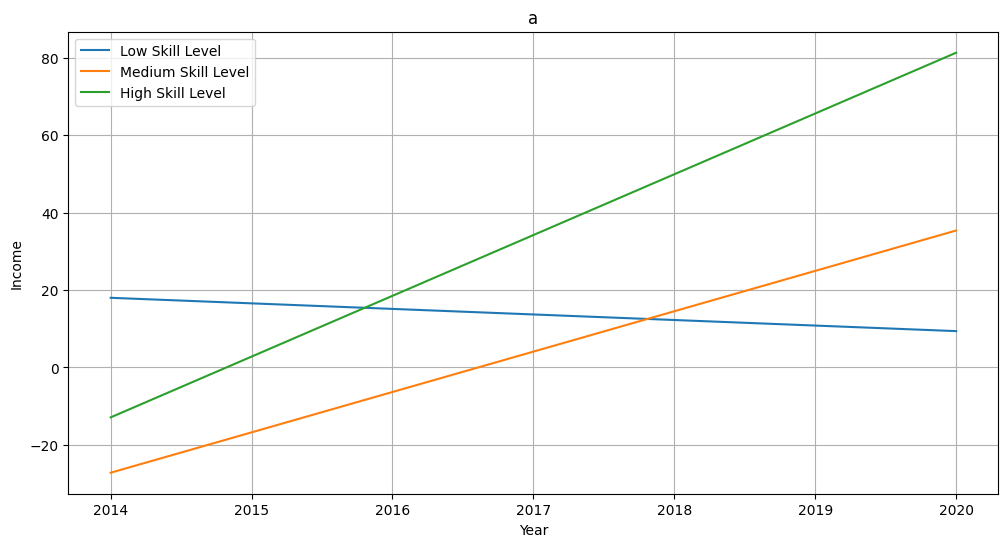

In [8]:
import matplotlib.pyplot as plt
# plot wrt time for Afghanistan 2014 and 2020
plt.figure(figsize=(12, 6))
plt.plot(row['time'], row['low_f']-row['low_m'], label='Low Skill Level')
plt.plot(row['time'], row['med_f']-row['med_m'], label='Medium Skill Level')
plt.plot(row['time'], row['high_f']-row['high_m'], label='High Skill Level')
plt.title('a')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()


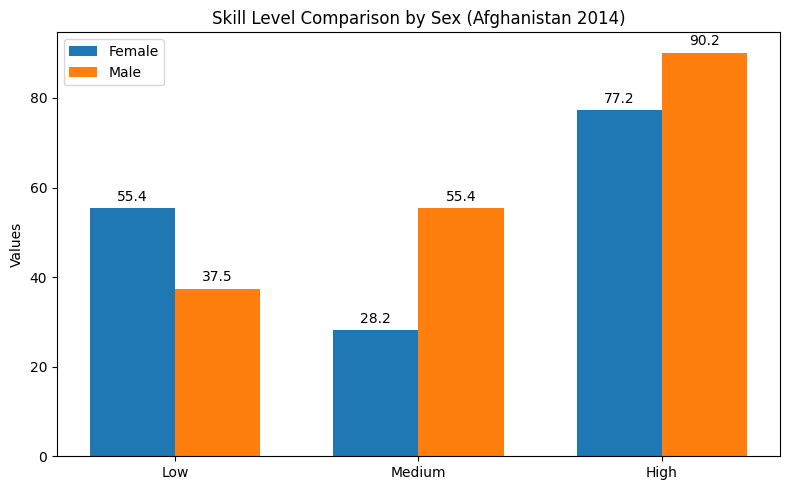

In [9]:




if not row.empty:
    row = row.iloc[0]

    # Define skill level labels and extract female and male values for each
    skill_levels = ['Low', 'Medium', 'High']
    female_values = [row['low_f'], row['med_f'], row['high_f']]
    male_values   = [row['low_m'], row['med_m'], row['high_m']]

    # Plotting setup: grouped bar chart
    import numpy as np
    x = np.arange(len(skill_levels))  # the label locations
    width = 0.35  # width of the bars

    fig, ax = plt.subplots(figsize=(8, 5))
    rects1 = ax.bar(x - width/2, female_values, width, label='Female')
    rects2 = ax.bar(x + width/2, male_values, width, label='Male')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Values')
    ax.set_title('Skill Level Comparison by Sex (Afghanistan 2014)')
    ax.set_xticks(x)
    ax.set_xticklabels(skill_levels)
    ax.legend()

    # Attach a text label above each bar, displaying its height.
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.show()
else:
    print("No data available for Afghanistan 2014")

In [10]:
df['ref_area.label']

1      Afghanistan
2      Afghanistan
3          Albania
4           Angola
5           Angola
          ...     
834         Zambia
835       Zimbabwe
836       Zimbabwe
837       Zimbabwe
838       Zimbabwe
Name: ref_area.label, Length: 838, dtype: object

In [12]:
import pandas as pd
import plotly.express as px
from io import StringIO



# Map countries to development category.
# In this example:
# - Afghanistan and Angola are classified as "Under Developing"
# - Albania and Argentina are classified as "Developed"
# development_mapping = {
#     'Afghanistan': 'Under Developing',
#     'Angola': 'Under Developing',
#     'Albania': 'Developed',
#     'Argentina': 'Developed'
# }
# df['development'] = df['ref_area.label'].map(development_mapping)

# Melt the DataFrame from wide to long format.
# The columns low_f, low_m, med_f, med_m, high_f, high_m, total_f, total_m
# are melted into a single column 'skill_sex', with corresponding 'value'.
melted = df.melt(
    id_vars=['ref_area.label', 'time'],
    value_vars=['low_f','low_m','med_f','med_m','high_f','high_m','total_f','total_m'],
    var_name='skill_sex',
    value_name='value'
)


In [13]:
melted.head()

,ref_area.label,time,skill_sex,value
0,Afghanistan,2014.0,low_f,55.43
1,Afghanistan,2020.0,low_f,52.04
2,Albania,2018.0,low_f,184.0
3,Angola,2019.0,low_f,194.39
4,Angola,2021.0,low_f,171.95


In [ ]:
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.1/386.1 KB 9.6 MB/s eta 0:00:0000:01


In [14]:

# Split the 'skill_sex' column into separate 'skill' and 'sex' columns.
melted['skill'] = melted['skill_sex'].apply(lambda x: x.split('_')[0])
melted['sex'] = melted['skill_sex'].apply(lambda x: x.split('_')[1])

# Define the unique skill categories to plot separately.
skill_categories = melted['skill'].unique()

# Create a Plotly bar chart for each skill category.
for skill in skill_categories:
    # Filter the melted data for the given skill category
    df_skill = melted[melted['skill'] == skill]
    
    # Create a grouped bar chart with facet for development category
    fig = px.bar(
        df_skill,
        x='ref_area.label',
        y='value',
        color='sex',
        barmode='group',
        # facet_col='development',
        title=f"{skill.capitalize()} Skill Values by Country and Sex",
        labels={'value': 'Value', 'ref_area_label': 'Country'}
    )
    
    # Optionally, update layout settings for better appearance
    fig.update_layout(
        height=400,
        width=800,
        margin=dict(l=40, r=40, t=40, b=40)
    )
    
    # Display the figure
    fig.show()

In [18]:
melted.head(10)

,ref_area.label,time,skill_sex,value,skill,sex
0,Afghanistan,2014.0,low_f,55.43,low,f
1,Afghanistan,2020.0,low_f,52.04,low,f
2,Albania,2018.0,low_f,184.0,low,f
3,Angola,2019.0,low_f,194.39,low,f
4,Angola,2021.0,low_f,171.95,low,f
5,Argentina,2004.0,low_f,2.96,low,f
6,Argentina,2005.0,low_f,3.26,low,f
7,Argentina,2006.0,low_f,3.86,low,f
8,Argentina,2008.0,low_f,5.95,low,f
9,Argentina,2009.0,low_f,7.37,low,f


In [22]:
argentina_data.sort_values(by= 'time')

,ref_area.label,time,skill_sex,value,skill,sex
5,Argentina,2004.0,low_f,2.96,low,f
2519,Argentina,2004.0,med_m,3.64,med,m
4195,Argentina,2004.0,high_m,8.13,high,m
1681,Argentina,2004.0,med_f,3.68,med,f
5033,Argentina,2004.0,total_f,4.18,total,f
...,...,...,...,...,...,...
1697,Argentina,2023.0,med_f,1070.15,med,f
859,Argentina,2023.0,low_m,790.26,low,m
21,Argentina,2023.0,low_f,842.06,low,f
5049,Argentina,2023.0,total_f,1256.2,total,f


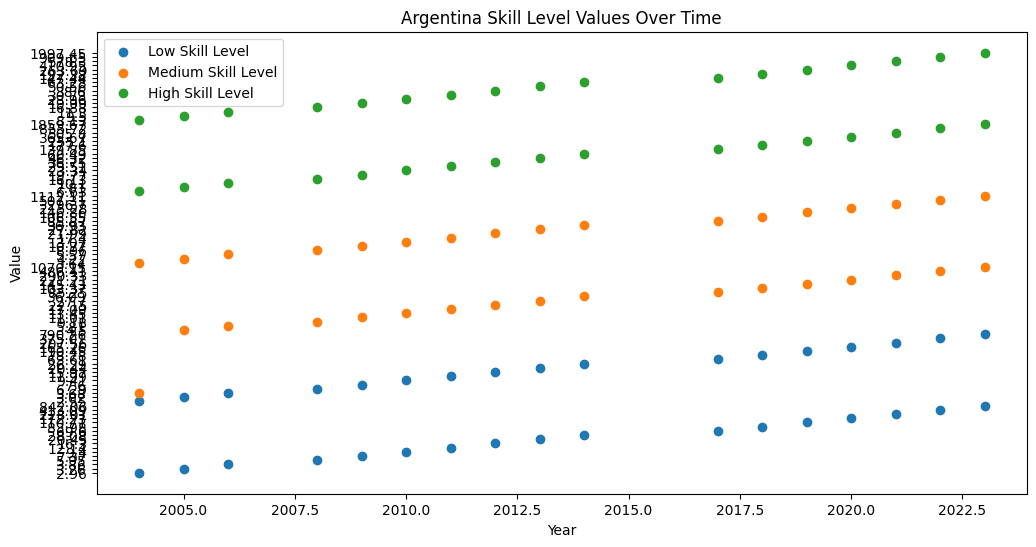

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['ref_area.label', 'time', 'low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m'] but received: value

In [ ]:
# for ref_area.label = Argentina plot logitudinal data m-l for each skill level 

# # Filter the data for Argentina
argentina_data = melted[melted['ref_area.label'] == 'Argentina']


plt.figure(figsize=(12, 6))
plt.scatter(argentina_data[argentina_data['skill'] == 'low']['time'], argentina_data[argentina_data['skill'] == 'low']['value'], label='Low Skill Level')
plt.scatter(argentina_data[argentina_data['skill'] == 'med']['time'], argentina_data[argentina_data['skill'] == 'med']['value'], label='Medium Skill Level')
plt.scatter(argentina_data[argentina_data['skill'] == 'high']['time'], argentina_data[argentina_data['skill'] == 'high']['value'], label='High Skill Level')
plt.title('Argentina Skill Level Values Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
# plt.grid(True)
plt.show()


In [58]:
df.to_csv('pivot_data_cleaned.csv', index=False)

In [60]:
df.columns

Index(['ref_area.label', 'time', 'low_f', 'low_m', 'med_f', 'med_m', 'high_f',
       'high_m', 'total_f', 'total_m'],
      dtype='object')

In [61]:
# convert columns[2:] to numeric
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 1 to 838
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  838 non-null    object 
 1   time            838 non-null    float64
 2   low_f           838 non-null    float64
 3   low_m           838 non-null    float64
 4   med_f           838 non-null    float64
 5   med_m           838 non-null    float64
 6   high_f          838 non-null    float64
 7   high_m          838 non-null    float64
 8   total_f         838 non-null    float64
 9   total_m         838 non-null    float64
dtypes: float64(9), object(1)
memory usage: 65.6+ KB


In [80]:
def toNumeric(df, index):
    for col in df.columns[index:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df = toNumeric(df, 2)



In [78]:

# bar chart for Argentina for each year
import plotly 
import plotly.express as px


# Filter the DataFrame for Argentina
argentina_data = df[(df['ref_area.label'] == 'Argentina')]

# Sort the DataFrame by the 'time' column
argentina= argentina_data.sort_values(by='time')


In [27]:
development_status_data = {
    'Country': ['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Singapore', 'Slovakia', 'Slovenia'],
    'Development Status': ['Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed', 'Developed', 'Developed', 'Developing', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed', 'Developed', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed', 'Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed', 'Developed', 'Developed']
}

development_status_df = pd.DataFrame(development_status_data)

# Merge the development status data with the original DataFrame
df_merged = pd.merge(df, development_status_df, left_on='Country', right_on='Country', how='left')

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m,Development Status
0,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68,Developing
1,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53,Developing
2,Albania,2018.0,184.00,193.00,1005.00,1203.00,1287.00,1359.00,282.00,303.00,Developing
3,Angola,2019.0,194.39,273.48,308.55,393.80,1025.32,1211.48,500.31,678.91,Developing
4,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06,Developing


In [33]:
# no of values for each unique country with 'Developed' status
df_merged[df_merged['Development Status'] == 'Developing']['Country'].value_counts()

Country
Peru                  24
Mexico                22
Colombia              21
Argentina             17
Chile                 16
Philippines           16
Cambodia              16
Indonesia             15
Egypt                 14
Pakistan              14
Costa Rica            13
Brazil                13
Malaysia              10
Hungary                7
India                  6
Ecuador                6
Bhutan                 5
Russian Federation     4
Armenia                4
Kenya                  3
Latvia                 3
Bulgaria               3
Bangladesh             2
Angola                 2
Poland                 2
Romania                2
Afghanistan            2
Albania                1
Croatia                1
Lithuania              1
Belarus                1
Name: count, dtype: int64

In [45]:
countries

Country
Peru           24
Mexico         22
Colombia       21
Argentina      17
Chile          16
Philippines    16
Cambodia       16
Indonesia      15
Egypt          14
Pakistan       14
Name: count, dtype: int64

In [47]:
# take the first 10 countries wrt value_counts
countries = df_merged[df_merged['Development Status'] == 'Developing']['Country'].value_counts().head(10)

# convert to list 
countries = countries.index.tolist()


# Filter the DataFrame for the selected countries
filtered_df = df_merged[df_merged['Country'].isin(countries)]

filtered_df.head()

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m,Development Status
5,Argentina,2004.0,2.96,2.55,3.68,3.64,6.63,8.13,4.18,4.39,Developing
6,Argentina,2005.0,3.26,3.02,4.50,4.27,7.81,9.50,4.84,5.14,Developing
7,Argentina,2006.0,3.86,3.68,5.81,5.57,10.10,11.30,6.16,6.38,Developing
8,Argentina,2008.0,5.95,6.29,9.18,8.96,16.13,16.88,9.95,10.19,Developing
9,Argentina,2009.0,7.37,7.60,11.01,10.77,19.77,19.99,12.32,12.15,Developing


In [70]:
filtered_df.iloc[:, :10]

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
5,Argentina,2004.0,2.96,2.55,3.68,3.64,6.63,8.13,4.18,4.39
6,Argentina,2005.0,3.26,3.02,4.50,4.27,7.81,9.50,4.84,5.14
7,Argentina,2006.0,3.86,3.68,5.81,5.57,10.10,11.30,6.16,6.38
8,Argentina,2008.0,5.95,6.29,9.18,8.96,16.13,16.88,9.95,10.19
9,Argentina,2009.0,7.37,7.60,11.01,10.77,19.77,19.99,12.32,12.15
...,...,...,...,...,...,...,...,...,...,...
560,Philippines,2018.0,75.10,59.73,66.88,74.09,149.38,150.50,90.67,78.57
561,Philippines,2019.0,82.46,64.16,71.37,78.37,159.60,163.39,97.79,84.07
562,Philippines,2020.0,89.82,74.83,85.71,90.42,199.77,187.31,117.94,97.35
563,Philippines,2021.0,94.23,77.27,85.59,91.71,170.59,168.56,111.81,96.10


In [75]:
df.head()

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
0,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
1,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
2,Albania,2018.0,184.00,193.00,1005.00,1203.00,1287.00,1359.00,282.00,303.00
3,Angola,2019.0,194.39,273.48,308.55,393.80,1025.32,1211.48,500.31,678.91
4,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06


In [ ]:
for country in df['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_diff(df, [country])
    

In [126]:
df_2 = pd.read_csv('Occupation.csv')
# drop the unnamed 
df_2.drop(columns= ['Unnamed: 0'], inplace= True)
df_2.head()

,Country,time,Armed forces occupations_Female,Armed forces occupations_Male,Managers_Female,Managers_Male,Professionals_Female,Professionals_Male,Technicians and associate professionals_Female,Technicians and associate professionals_Male,...,Service and sales workers_Female,Service and sales workers_Male,"Skilled agricultural, forestry and fishery workers_Female","Skilled agricultural, forestry and fishery workers_Male",Craft and related trades workers_Female,Craft and related trades workers_Male,"Plant and machine operators, and assemblers_Female","Plant and machine operators, and assemblers_Male",Elementary_Female,Elementary_Male
0,Bosnia and Herzegovina,2011,0.00,5.03,5.87,7.12,7.02,7.54,4.08,5.48,...,2.99,4.00,2.30,3.45,2.34,3.92,2.84,3.78,2.63,4.24
1,Bosnia and Herzegovina,2020,11.10,8.03,10.44,11.10,10.61,9.71,8.20,8.79,...,4.93,7.31,5.57,7.19,6.35,11.88,4.61,8.74,5.11,6.56
2,Bosnia and Herzegovina,2021,7.58,9.16,9.39,10.36,10.13,10.10,8.13,8.32,...,4.85,6.88,6.25,7.38,4.59,7.42,4.95,7.37,5.17,6.02
3,Bosnia and Herzegovina,2022,9.77,9.64,8.98,11.19,10.45,10.60,8.69,8.96,...,5.35,7.11,7.49,7.22,4.98,7.77,5.53,8.08,5.81,6.65
4,Brazil,2012,19.49,16.80,15.70,18.69,17.07,23.71,10.28,12.50,...,5.07,6.81,4.67,4.26,5.33,6.84,5.06,7.10,4.60,4.52


In [66]:
df_ed = pd.read_csv('Uneducation.csv')
df_ed.head()

,Country,Sex,Value,Time
0,Aruba,Male,17.400,2010
1,Aruba,Female,15.640,2010
2,Afghanistan,Male,19.632,2021
3,Afghanistan,Female,65.079,2021
4,Afghanistan,Male,32.164,2020


In [67]:


# pivot the data wrt sex
df_ed_pivot = df_ed.pivot_table(index=['Country', 'Time'],
                                values='Value',
                                columns= 'Sex')

In [174]:
df_ed_pivot.to_csv('Uneducation_pivot.csv')

In [3]:
import pandas as pd
df_ed_pivot = pd.read_csv('Uneducation_pivot.csv')



In [4]:
df_ed_pivot.head()

,Country,Time,Female,Male
0,APEC,2005,21.871,13.597
1,APEC,2006,21.664,13.297
2,APEC,2007,21.262,13.010
3,APEC,2008,21.114,12.969
4,APEC,2009,21.208,13.386


In [69]:
# get max no of values for each country
countries = df_ed_pivot['Country'].value_counts().index.to_list()[:30]


In [71]:
df_ed_pivot[' Female']

0       21.871
1       21.664
2       21.262
3       21.114
4       21.208
         ...  
3890    21.770
3891    36.174
3892    35.561
3893    37.689
3894    36.045
Name:  Female, Length: 3895, dtype: float64

In [6]:
import plotly.graph_objects as go

# Remove leading spaces from column names
df_ed_pivot.columns = df_ed_pivot.columns.str.strip()

def plot_uned(df, countries):
    
    fig = go.Figure()
    for country in countries:
        # Filter the data for the given country
        country_data = df[df['Country'] == country]
        # Sort by time
        country_data = country_data.sort_values(by='Time')
        country_data['Inequality'] = (country_data['Female'] - country_data['Male']) / country_data['Male']
        # Add traces for Female and Male
        fig.add_trace(go.Scatter(x=country_data['Time'], y=country_data['Female'], mode='lines', name=f'Female - {country}'))
        fig.add_trace(go.Scatter(x=country_data['Time'], y=country_data['Inequality'], mode='lines', name=f'{country}'))
        fig.add_trace(go.Scatter(x=country_data['Time'], y=country_data['Male'], mode='lines', name=f'Male - {country}'))
   
        # Update layout
    fig.update_layout(
        title=f'% Youth(18-24) not in education, employment or training in {country} Over Time',
        xaxis_title='Year',
        yaxis_title='% Uneducation',
        legend_title_text='Sex ',
        showlegend=True,
        template='plotly_white',
        title_font=dict(size=18, family='Arial, bold', color='darkblue'),
        xaxis=dict(showgrid=True, gridcolor='lightgrey', tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='lightgrey'),
        legend=dict(
            x=0.5,
            y=-0.2,
            traceorder='normal',
            font=dict(size=12),
            orientation='h',
            xanchor='center',
            yanchor='top'
        ),
        margin=dict(l=40, r=40, t=80, b=80)
    )
    path = f'Results/Education/{country}.html'
    fig.write_html(path)
        
        # fig.show()

# Example usage
# coun
for country in df_ed_pivot['Country'].unique():
    plot_uned(df_ed_pivot, [country])

In [73]:
df_ed_pivot.head()

,Country,Time,Female,Male
0,APEC,2005,21.871,13.597
1,APEC,2006,21.664,13.297
2,APEC,2007,21.262,13.010
3,APEC,2008,21.114,12.969
4,APEC,2009,21.208,13.386


In [ ]:
# Strip any leading or trailing spaces from the column names
from sympy import plot


df_ed_pivot.columns = df_ed_pivot.columns.str.strip()

# plot the data for each country
# for country in countries:
#     # Filter the data for the given country
#     country_data = df_ed_pivot[df_ed_pivot['Country'] == country]
#     plot_uned(df_ed_pivot, [country])
plot_uned(df_ed_pivot, Asia)

In [221]:
df_ed_pivot['Country'].unique()
# every country with World in the name
countries = df_ed_pivot['Country'].unique()
world = [country for country in countries if 'World' in country]
world

['World',
 'World excluding BRICS',
 'World excluding India and China',
 'World: High income',
 'World: Low income',
 'World: Lower-middle income',
 'World: Lower-middle income excluding India',
 'World: Upper-middle income',
 'World: Upper-middle income excluding China']

In [223]:
African = [country for country in countries if 'Africa' in country]

In [227]:
Asia =  [country for country in countries if 'Asia' in country]

In [ ]:
for country in df_2['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_occupation(df, [country])

In [140]:
df_2.iloc[:, 1:] = df_2.iloc[:, 1:].apply(pd.to_numeric)

In [141]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    186 non-null    object 
 1   time                                                       186 non-null    int64  
 2   Armed forces occupations_Female                            186 non-null    float64
 3   Armed forces occupations_Male                              186 non-null    float64
 4   Managers_Female                                            186 non-null    float64
 5   Managers_Male                                              186 non-null    float64
 6   Professionals_Female                                       186 non-null    float64
 7   Professionals_Male                                         186 non-null    float64
 8   Technician

In [ ]:
df_2['time ']

In [ ]:
def plot_country_occupation(df, countries):
    for country in countries:
        country_data = df[df['Country'] == country]
        # change time to float
        country_data.iloc[:, 1:] = country_data.iloc[:, 1:].apply(pd.to_numeric)
        country_data = country_data.sort_values(by='time ')
        # # get difference between m and f for occupation
        for col in df.columns[2::2]:  # iterate over female columns
            male_col = col.replace('_Female', '_Male')
            diff_col = col.replace('_Female', '_Diff')
            country_data[diff_col] = (country_data[male_col] - country_data[col]) / country_data[male_col]
        
        fig = px.line(country_data, x='time ', y=country_data.columns[2:], title=f'{country} Ocupation Pay Gap Over Time')
        # save the plot to a file in results folder
        path = f'Results/Occupation/{country}_paygap.html'
        fig.write_html(path)
        # plotly.offline.plot(fig, filename=f'{country}_paygap.html')

    fig.show()

for country in df_2['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_occupation(df_2, [country])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [148]:
def plot_country_occupation(df, countries):
    for country in countries:
        country_data = df[df['Country'] == country]
        # change time to float
        country_data.iloc[:, 1:] = country_data.iloc[:, 1:].apply(pd.to_numeric)
        country_data = country_data.sort_values(by='time ')
        
        # get difference between m and f for occupation
        for col in df.columns[2::2]:  # iterate over female columns
            male_col = col.replace('_Female', '_Male')
            diff_col = col.replace('_Female', '_Diff')
            country_data[diff_col] = (country_data[male_col] - country_data[col]) / country_data[male_col]
        
        fig = px.line(country_data, x='time ', y=[col for col in country_data.columns if '_Diff' in col], title=f'{country} Occupation Pay Gap Over Time')
        # save the plot to a file in results folder
        path = f'Results/Occupation/{country}_paygap.html'
        fig.write_html(path)
        # plotly.offline.plot(fig, filename=f'{country}_paygap.html')

    fig.show()

for country in df_2['Country'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_country_occupation(df_2, [country])

In [74]:
df = pd.read_csv('pivot_data_cleaned.csv')

def plot_country_diff(df, countries):
    for country in countries:
        country_data = df[df['Country'] == country]
        country_data = country_data.sort_values(by='time')
        # get difference between m and f for each skill level
        country_data['low_skill_paygap'] = (country_data['low_m'] - country_data['low_f'])/country_data['low_m']
        country_data['med_skill_paygap'] = (country_data['med_m'] - country_data['med_f'])/country_data['med_m']
        country_data['high_skill_paygap'] = (country_data['high_m'] - country_data['high_f'])/country_data['high_m']
        fig = px.line(country_data, x='time', y=country_data.columns[2:], title=f'{country} Skill Level Pay Gap Over Time')
        # save the plot to a file in results folder
        path = f'Results/{country}_paygap.html'
        fig.write_html(path)
        # plotly.offline.plot(fig, filename=f'{country}_paygap.html')

    fig.show()

plot_country_diff(df, ['Peru'])

In [100]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 10.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('pivot_data_cleaned.csv')

def plot_country_diff(df, country):
    
    country_data = df[df['Country'] == country]
    country_data = country_data.sort_values(by='time')
    # get difference between m and f for each skill level
    country_data['low_skill_paygap'] = (country_data['low_m'] - country_data['low_f']) / country_data['low_m']
    country_data['med_skill_paygap'] = (country_data['med_m'] - country_data['med_f']) / country_data['med_m']
    country_data['high_skill_paygap'] = (country_data['high_m'] - country_data['high_f']) / country_data['high_m']
    
    # Create a line plot with smoothed trend lines
    fig = px.scatter(country_data, x='time', y=['low_skill_paygap', 'med_skill_paygap', 'high_skill_paygap'],
                     title=f'{country} Skill Level Pay Gap Over Time', opacity=0.3)
    
    # Add smoothed trend lines
    fig.update_traces(mode='lines+markers')
    fig.add_traces(px.scatter(country_data, x='time', y='low_skill_paygap', trendline='lowess', opacity= 0.1).data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='med_skill_paygap', trendline='lowess',opacity= 0.01).data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='high_skill_paygap', trendline='lowess',opacity= 0.001).data[1])
    
    fig.show()

plot_country_diff(df, 'Peru')

In [26]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output, State
import plotly.express as px
import plotly.io as pio
import base64

# Load the data
df = pd.read_csv('pivot_data_cleaned.csv')

# Initialize the Dash app
app = Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Skill Level Pay Gap Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select Country:"),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in df['Country'].value_counts().index],
            value=df['Country'].value_counts().index[0],  # Default value
            style={'width': '50%'}
        )
    ], style={'textAlign': 'center', 'marginBottom': '20px'}),
    
    dcc.Graph(id='paygap-graph'),
    
    html.Div([
        html.Button("Save Plot", id="save-button", n_clicks=0),
        dcc.Download(id="download-image")
    ], style={'textAlign': 'center', 'marginTop': '20px'})
])

# Define the callback to update the graph based on dropdown selection
@app.callback(
    Output('paygap-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    country_data = df[df['Country'] == selected_country]
    country_data = country_data.sort_values(by='time')
    # get difference between m and f for each skill level
    country_data['low_skill_paygap'] = (country_data['low_m'] - country_data['low_f']) / country_data['low_m']
    country_data['med_skill_paygap'] = (country_data['med_m'] - country_data['med_f']) / country_data['med_m']
    country_data['high_skill_paygap'] = (country_data['high_m'] - country_data['high_f']) / country_data['high_m']
    
    # Create a line plot with smoothed trend lines
    fig = px.scatter(country_data, x='time', y=['low_skill_paygap', 'med_skill_paygap', 'high_skill_paygap'],
                     title=f'{selected_country} Skill Level Pay Gap Over Time', opacity=0.3)
    
    # Add smoothed trend lines
    fig.update_traces(mode='lines+markers')
    fig.add_traces(px.scatter(country_data, x='time', y='low_skill_paygap', trendline='lowess', trendline_color_override='blue').data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='med_skill_paygap', trendline='lowess', trendline_color_override='red').data[1])
    fig.add_traces(px.scatter(country_data, x='time', y='high_skill_paygap', trendline='lowess', trendline_color_override='green').data[1])
    
    # Update layout to adjust title position and style
    fig.update_layout(
        title={
            'text': f'{selected_country} Skill Level Pay Gap Over Time',
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        margin=dict(l=0, r=5, t=50, b=0),
        title_font=dict(size=20)
    )
    
    return fig

# Define the callback to save the plot
@app.callback(
    Output("download-image", "data"),
    [Input("save-button", "n_clicks")],
    [State("paygap-graph", "figure"), State('country-dropdown', 'value')]
)
def save_plot(n_clicks, figure, selected_country):
    if n_clicks > 0:
        img_bytes = pio.to_image(figure, format='png', engine='kaleido')
        img_base64 = base64.b64encode(img_bytes).decode('utf-8')
        filename = f"{selected_country}_Skill_Level_Pay_Gap_Over_Time.png"
        return dict(content=img_base64, filename=filename)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

In [117]:
pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# no of values for each uniqe country
df['Country'].value_counts()

In [88]:
df.head()

,Country,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
0,Afghanistan,2014.0,55.43,37.45,28.16,55.37,77.24,90.15,49.77,53.68
1,Afghanistan,2020.0,52.04,42.67,95.67,60.31,216.61,135.32,183.93,81.53
2,Albania,2018.0,184.00,193.00,1005.00,1203.00,1287.00,1359.00,282.00,303.00
3,Angola,2019.0,194.39,273.48,308.55,393.80,1025.32,1211.48,500.31,678.91
4,Angola,2021.0,171.95,286.39,295.27,322.43,1111.75,1020.48,500.89,574.06


In [83]:
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 6 to 22
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  17 non-null     object 
 1   time            17 non-null     float64
 2   low_f           17 non-null     float64
 3   low_m           17 non-null     float64
 4   med_f           17 non-null     float64
 5   med_m           17 non-null     float64
 6   high_f          17 non-null     float64
 7   high_m          17 non-null     float64
 8   total_f         17 non-null     float64
 9   total_m         17 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.5+ KB


In [63]:
argentina

,ref_area.label,time,low_f,low_m,med_f,med_m,high_f,high_m,total_f,total_m
6,Argentina,2004.0,2.96,2.55,3.68,3.64,6.63,8.13,4.18,4.39
7,Argentina,2005.0,3.26,3.02,4.5,4.27,7.81,9.5,4.84,5.14
8,Argentina,2006.0,3.86,3.68,5.81,5.57,10.1,11.3,6.16,6.38
9,Argentina,2008.0,5.95,6.29,9.18,8.96,16.13,16.88,9.95,10.19
10,Argentina,2009.0,7.37,7.6,11.01,10.77,19.77,19.99,12.32,12.15
11,Argentina,2010.0,9.4,9.41,13.45,13.07,23.34,23.96,15.13,14.86
12,Argentina,2011.0,12.14,11.99,17.09,17.4,29.51,30.73,19.37,19.64
13,Argentina,2012.0,16.3,15.97,22.15,21.99,36.75,38.6,24.82,24.6
14,Argentina,2013.0,20.45,20.44,27.7,27.82,46.32,50.56,31.25,31.58
15,Argentina,2014.0,28.08,26.29,36.09,36.93,60.49,63.28,41.11,40.91


In [85]:

# Calculate the difference between male and female internet usage
argentina['low'] = argentina['low_f'] - argentina['low_m']
argentina['med'] = argentina['med_f'] - argentina['med_m']
argentina['high'] = argentina['high_f'] - argentina['high_m']
argentina['total'] = argentina['total_f'] - argentina['total_m']

# Create a bar chart for the differences
fig = px.bar(argentina, x='time', y=['low', 'med', 'high', 'total'],
             title='Difference in Wages Between Male and Female in Argentina by Year',
             labels={'time': 'Year', 'value': 'Difference in Wages'},
             barmode='group')
fig.show()

In [ ]:
# convert time to string
argentina['time'] = argentina['time'].astype('str')
# # Standardize the data by subtracting the mean and dividing by the standard deviation
# columns_to_standardize = ['low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m']
# argentina[columns_to_standardize] = argentina[columns_to_standardize].apply(lambda x: (x - x.mean()) / x.std())


In [53]:
# Create a bar chart for Argentina for each year
fig = px.scatter(argentina, x='time', y=['low_f', 'low_m', 'med_f', 'med_m', 'high_f', 'high_m', 'total_f', 'total_m'],
             title='Argentina Internet Usage by Year',
             labels={'time': 'Year', 'value': 'Internet Usage'},
             )
# Create a bar chart for Argentina for each year
fig = px.bar(argentina, x='time', y=columns_to_standardize,
             title='Standardized Argentina Internet Usage by Year',
             labels={'time': 'Year', 'value': 'Standardized Internet Usage'},
             barmode='group')


# Show the plot
fig.show()

In [ ]:

# Create a bar chart for Argentina for each year
fig = px.bar(argentina_data, x='time', y='value', title='Argentina Internet Usage by Year',
             labels={'time': 'Year', 'obs_value': 'Internet Usage'})

# Show the plot
fig.show()

In [ ]:
df_pivot_1.dropna(inplace=True)



In [ ]:

# 2) Keep only rows where Sex is either "Male" or "Female" 
#    (exclude "Total" if it doesn't represent a single sex)
df = df[df["sex.label"].isin(["Sex: Male", "Sex: Female"])]

# 3) Pivot the data so that each OccupationSkillLevel has separate columns for Male and Female incomes
#    - We assume the occupation skill level is in a column named "OccupationSkillLevel"
#    - The numeric income measure is in "Income"
df_pivot = df.pivot_table(
    index="classif1.label", 
    columns="sex.label", 
    values="obs_value", 
    # aggfunc="mean"  # or sum, or whatever is appropriate
)

# 4) Calculate the gender gap measure for each occupation skill level:
#    gender_gap = (Male_income - Female_income) / Male_income
df_pivot["gender_gap"] = (df_pivot["Male"] - df_pivot["Female"]) / df_pivot["Male"]

# 5) Inspect the resulting DataFrame
print(df_pivot)

# 6) Plot the gender gap as a bar chart
plt.figure(figsize=(8, 5))
df_pivot["gender_gap"].plot(kind="bar", color="skyblue")

plt.title("Gender Gap by Occupation Skill Level")
plt.xlabel("Occupation Skill Level")
plt.ylabel("Gender Gap ((M - F)/M)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [1]:
import pandas as pd

hypertensiondata = "RELAY_WHS.csv"
hypertension = pd.read_csv(hypertensiondata)


In [3]:
hypertension.columns

Index(['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME',
       'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE',
       'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT', 'DIM_SEX',
       'RATE_PER_100_N', 'RATE_PER_100_NL', 'RATE_PER_100_NU'],
      dtype='object')

In [ ]:
# get country == ['Bangladesh', 'USA', 'Rawanda']
hypertension_bangladesh = hypertension[hypertension['GEO_NAME_SHORT'].isin(['Bangladesh'])]


In [11]:
hypertension_bangladesh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 18585
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  90 non-null     object 
 1   IND_CODE                90 non-null     object 
 2   IND_UUID                90 non-null     object 
 3   IND_PER_CODE            90 non-null     object 
 4   DIM_TIME                90 non-null     int64  
 5   DIM_TIME_TYPE           90 non-null     object 
 6   DIM_GEO_CODE_M49        90 non-null     int64  
 7   DIM_GEO_CODE_TYPE       90 non-null     object 
 8   DIM_PUBLISH_STATE_CODE  90 non-null     object 
 9   IND_NAME                90 non-null     object 
 10  GEO_NAME_SHORT          90 non-null     object 
 11  DIM_SEX                 90 non-null     object 
 12  RATE_PER_100_N          90 non-null     float64
 13  RATE_PER_100_NL         90 non-null     float64
 14  RATE_PER_100_NU         90 non-null     float6

In [ ]:
coloumns = [ 'DIM_TIME', 'IND_NAME', 'GEO_NAME_SHORT', 'DIM_SEX',
       'RATE_PER_100_N', 'RATE_PER_100_NL', 'RATE_PER_100_NU']

In [14]:
hypertension_bangladesh = hypertension_bangladesh[coloumns]

In [39]:
from cProfile import label
import plotly.express as px
import plotly.graph_objects as go

def plot_hypertension(df, country):
    # Filter the data for the specified country
    country_data = df[df['GEO_NAME_SHORT'] == country]
    
    # Sort the data by time
    country_data = country_data.sort_values(by='DIM_TIME')
    
    # Create a plotly figure
    fig = go.Figure()
    indicator = country_data['IND_NAME'].unique()[0]
    
    # Add traces for each sex and indicator
    for sex in country_data['DIM_SEX'].unique():
        data = country_data[(country_data['DIM_SEX'] == sex)]
        fig.add_trace(go.Scatter(x=data['DIM_TIME'], y=data['RATE_PER_100_N'], mode='lines+markers', name=f'{sex}-N'))
        # fig.add_trace(go.Scatter(
        #     x=data['DIM_TIME'], 
        #     y=data['RATE_PER_100_NL'], 
        #     name=f'{sex}-Lower Bound',
        #     mode='lines', 
        #     line=dict(width=0),
        #     showlegend=False
        # ))
        # fig.add_trace(go.Scatter(
        #     x=data['DIM_TIME'], 
        #     y=data['RATE_PER_100_NU'], 
        #     name = f'{sex}-Upper Bound',
        #     mode='lines', 
        #     line=dict(width=0),
        #     fill='tonexty', 
        #     fillcolor='rgba(0,100,80,0.2)', 
        #     showlegend=False
        # ))
    # Update layout to ensure the legend is visible and improve appearance
    fig.update_layout(
        title=f'{indicator} in {country} Over Time',
        xaxis_title='Year',
        yaxis_title='Rate Per 100 N',
        legend_title_text='Sex and Indicator',
        showlegend=True,
        template='plotly_white',
        title_font=dict(size=24, family='Arial, bold', color='darkblue'),
        xaxis=dict(showgrid=True, gridcolor='lightgrey', tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='lightgrey'),
        legend=dict(
            x=0.5,
            y=-0.2,
            traceorder='normal',
            font=dict(size=12),
            orientation='h',
            xanchor='center',
            yanchor='top'
        ),
        margin=dict(l=40, r=40, t=80, b=80)
    )
    
    path = f'Results/Hypertension/{country}.html'
    fig.write_html(path)
    
    fig.show()

# Example usage
plot_hypertension(hypertension, 'Bangladesh')


In [ ]:
for country in hypertension['GEO_NAME_SHORT'].unique():
    # Filter the data for the given country
    # country_data = filtered_df[filtered_df['Country'] == country].iloc[:,:10]
    plot_hypertension(hypertension, country)
    # save the plot to a file in results folder 



In [ ]:
hypertension_bangladesh.tail

,DIM_TIME,IND_NAME,GEO_NAME_SHORT,DIM_SEX,RATE_PER_100_N,RATE_PER_100_NL,RATE_PER_100_NU
3405,2018,Hypertension in adults (age 30 to 79),Bangladesh,MALE,23.6,18.6,29.1
15973,2018,Hypertension in adults (age 30 to 79),Bangladesh,TOTAL,28.6,24.9,32.5
8,2019,Hypertension in adults (age 30 to 79),Bangladesh,FEMALE,34.2,28.2,40.7
12390,2019,Hypertension in adults (age 30 to 79),Bangladesh,MALE,23.5,17.9,29.8
16663,2019,Hypertension in adults (age 30 to 79),Bangladesh,TOTAL,28.8,24.6,33.2


In [64]:
import re
import os
def plot_metric(df, country):
    # Filter the data for the specified country
    country_data = df[df['GEO_NAME_SHORT'] == country]
    
    # Sort the data by time
    country_data = country_data.sort_values(by='DIM_TIME')
    
    # Create a plotly figure
    fig = go.Figure()
    indicator = country_data['IND_NAME'].unique()[0]
    
    # Use regex to filter columns that match the pattern 'RATE_PER_*_N'
    rate_columns = country_data.filter(regex='RATE_PER.*N').columns
    
    # Add traces for each sex and indicator
    for sex in country_data['DIM_SEX'].unique():
        data = country_data[country_data['DIM_SEX'] == sex]
        for col in rate_columns:
            fig.add_trace(go.Scatter(x=data['DIM_TIME'], y=data[col], mode='lines+markers', name=f'{sex}'))
            break
    # Update layout to ensure the legend is visible and improve appearance
    fig.update_layout(
        title=f'{indicator} in {country} Over Time',
        xaxis_title='Year',
        yaxis_title=f'{rate_columns[0]}',
        legend_title_text='Sex',
        showlegend=True,
        template='plotly_white',
        title_font=dict(size=20, family='Arial, bold', color='darkblue'),
        xaxis=dict(showgrid=True, gridcolor='lightgrey', tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='lightgrey'),
        legend=dict(
            x=0.5,
            y=-0.2,
            traceorder='normal',
            font=dict(size=12),
            orientation='h',
            xanchor='center',
            yanchor='top'
        ),
        margin=dict(l=40, r=40, t=80, b=80)
    )
    folder = re.sub(r'\W+', '', indicator)
    new = f'Results/{folder}'
    if not os.path.exists(new):
        os.makedirs(f'Results/{folder}')
    path = f'Results/{folder}/{country}.html'
    fig.write_html(path)
    
    # fig.show()

# Example usage
plot_metric(hypertension, 'Bangladesh')


In [65]:
import os
path = 'Health_Data'

# for each csv file in the folder
for file in os.listdir(path):
    # 
    if file.endswith('.csv'):
        # read the csv file
        df = pd.read_csv(path+"/"+file)
        # plot the data
        for country in df['GEO_NAME_SHORT'].unique():
            plot_metric(df, country)
            print(f'{country} plotted')
        print(f'{file} done')
        # save the plot to a file in results folder

Guyana plotted
Saint Kitts and Nevis plotted
San Marino plotted
Sao Tome and Principe plotted
Serbia plotted
South Africa plotted
Chile plotted
Colombia plotted
Comoros plotted
Kuwait plotted
Kyrgyzstan plotted
Libya plotted
Hungary plotted
India plotted
Iraq plotted
Suriname plotted
Eswatini plotted
Sweden plotted
Switzerland plotted
Togo plotted
Estonia plotted
Finland plotted
Viet Nam plotted
Zimbabwe plotted
Sudan plotted
Germany plotted
Senegal plotted
Chad plotted
Qatar plotted
Sierra Leone plotted
Burundi plotted
Cabo Verde plotted
Croatia plotted
Denmark plotted
Poland plotted
Romania plotted
Botswana plotted
Cambodia plotted
Bolivia (Plurinational State of) plotted
Brazil plotted
Central African Republic plotted
Democratic Republic of the Congo plotted
Nigeria plotted
Niue plotted
Bhutan plotted
Mozambique plotted
Nauru plotted
Nepal plotted
Norway plotted
World plotted
Australia plotted
Belize plotted
Monaco plotted
Mongolia plotted
Oman plotted
Azerbaijan plotted
Malta plott